# CREDIT EDA ASSIGNMENT


###Importing Libraries.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit

#**Dataset used are mention below**
1. applicationdata for application_data.csv
2. previousdata for previous_application.csv

###Loading data using pandas library

In [ ]:
applicationdata = pd.read_csv("application_data.csv")
applicationdata.head(50)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13      100017       0         Cash loans           M            Y   
14      100018       0         Cash loans           F            N   
15      100019       0         Cash loans           M            Y   
16      100020       0         Cash loans           M            N   
17      100021       0    Revolving loans           F            N   
18      100022       0    Revolving loans           F            N   
19      100023       0         Cash loans           F            N   
20      100024       0    Revolving loans           M            Y   
21      100025       0         Cash loans           F            Y   
22      100026       0         Cash loans           F            N   
23      100027       0         Cash loans           F            N   
24      100029       0         Cash loans           M            Y   
25      100030       0         Cash loans           F            N   
26      100031       1         Cash loans           F            N   
27      100032       0         Cash loans           M            N   
28      100033       0         Cash loans           M            Y   
29      100034       0    Revolving loans           M            N   
30      100035       0         Cash loans           F            N   
31      100036       0         Cash loans           F            N   
32      100037       0         Cash loans           F            N   
33      100039       0         Cash loans           M            Y   
34      100040       0         Cash loans           F            N   
35      100041       0         Cash loans           F            N   
36      100043       0         Cash loans           F            N   
37      100044       0         Cash loans           M            N   
38      100045       0         Cash loans           F            N   
39      100046       0    Revolving loans           M            Y   
40      100047       1         Cash loans           M            N   
41      100048       0         Cash loans           F            N   
42      100049       1         Cash loans           F            N   
43      100050       0         Cash loans           F            N   
44      100051       0         Cash loans           M            N   
45      100052       0    Revolving loans           F            N   
46      100053       0         Cash loans           F            N   
47      100054       0         Cash loans           F            N   
48      100055       0         Cash loans           F            N   
49      100056       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0        202500.000    406597.5      24700.5   
1                N             0        270000.000   1293502.5      35698.5   
2                Y             0         67500.000    135000.0       6750.0   
3                Y             0        135000.000    312682.5      29686.5   
4                Y             0      

###Checking the data set size.

In [ ]:
applicationdata.shape

(307511, 122)

###checking dataset columns and datatype.

In [ ]:
applicationdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#**Data cleaning**

###Getting the percentage of missing value in each column.

In [ ]:
(applicationdata.isnull().sum()/len(applicationdata)*100).sort_values(ascending = False).head(121)

COMMONAREA_MEDI               69.872297
COMMONAREA_AVG                69.872297
COMMONAREA_MODE               69.872297
NONLIVINGAPARTMENTS_MODE      69.432963
NONLIVINGAPARTMENTS_AVG       69.432963
                                ...    
REGION_POPULATION_RELATIVE     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
Length: 121, dtype: float64

###Total number of column with more than equal to 35% of null values.

In [ ]:
null_col = applicationdata.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(applicationdata))]
len(null_col)

49

###Removing the column present in null_col variable.

In [ ]:
label = list(null_col.index.values)
applicationdata.drop(labels = label,axis=1,inplace = True)

###Verifing after dropping the column

In [ ]:
applicationdata.shape
null = (applicationdata.isnull().sum()/len(applicationdata)*100).sort_values(ascending = False).head()
null.head()

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
dtype: float64

#**Data Handling / Handling Missing Values**

###For column with continous data, we can use median as well as mean and in case of categorial we can use mode.
Here we will impute the column having null values less than 20.

In [ ]:

applicationdata.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True)

applicationdata.AMT_REQ_CREDIT_BUREAU_MON.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)

applicationdata.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True)

applicationdata.AMT_REQ_CREDIT_BUREAU_DAY.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)

applicationdata.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True)

applicationdata.AMT_REQ_CREDIT_BUREAU_QRT.fillna(applicationdata.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)

applicationdata.NAME_TYPE_SUITE.fillna(applicationdata.NAME_TYPE_SUITE.mode()[0],inplace = True)

applicationdata.OBS_30_CNT_SOCIAL_CIRCLE.fillna( applicationdata.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

applicationdata.DEF_30_CNT_SOCIAL_CIRCLE.fillna( applicationdata.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

applicationdata.OBS_60_CNT_SOCIAL_CIRCLE.fillna( applicationdata.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

applicationdata.DEF_60_CNT_SOCIAL_CIRCLE.fillna( applicationdata.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True)

applicationdata.CNT_FAM_MEMBERS.fillna(applicationdata.CNT_FAM_MEMBERS.mode() , inplace = True)

applicationdata.DAYS_LAST_PHONE_CHANGE.fillna(applicationdata.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True)

applicationdata.EXT_SOURCE_2.fillna(applicationdata.EXT_SOURCE_2.median() , inplace = True)

applicationdata.EXT_SOURCE_3.fillna(applicationdata.EXT_SOURCE_3.median() , inplace = True)

###Verifing the data handling solution

In [ ]:
(applicationdata.isnull().sum()/len(applicationdata)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

#**Handling error in dataset**

###Taking count in CODE_GENDER values.

In [ ]:
applicationdata.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

###As we can see F has more frequent, XNA can be change to F

In [ ]:
applicationdata.loc[applicationdata.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
applicationdata.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

###Changing negative data or irrelevant data into proper one. Below mention are the example of such column.
1. DAYS_BIRTH
2. DAYS_EMPLOYED
3. DAYS_REGISTRATION
4. DAYS_ID_PUBLISH
5. DAYS_LAST_PHONE_CHANGE  

In [ ]:
day_cols = [i for i in applicationdata if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

###Using abs() function so that negative number can betranslated to positive one

In [ ]:
applicationdata[day_cols]= abs(applicationdata[day_cols])

###Verifing solution of abs()

In [ ]:
print(applicationdata['DAYS_BIRTH'].unique())
print(applicationdata['DAYS_EMPLOYED'].unique())
print(applicationdata['DAYS_REGISTRATION'].unique())
print(applicationdata['DAYS_ID_PUBLISH'].unique())
print(applicationdata['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


###Assigning the flag value to 2 column having Y and N only as the value. 1 for Y and 0 for N.

In [ ]:
applicationdata['FLAG_OWN_CAR'] = np.where(applicationdata['FLAG_OWN_CAR']=='Y', 1 , 0)
applicationdata['FLAG_OWN_REALTY'] = np.where(applicationdata['FLAG_OWN_REALTY']=='Y', 1 , 0)

###Verifing the solution

In [ ]:
applicationdata[['FLAG_OWN_CAR','FLAG_OWN_REALTY']].head(30)

FLAG_OWN_CAR  FLAG_OWN_REALTY
0              0                1
1              0                0
2              1                1
3              0                1
4              0                1
5              0                1
6              1                1
7              1                1
8              0                1
9              0                1
10             0                1
11             0                1
12             0                1
13             1                0
14             0                1
15             1                1
16             0                0
17             0                1
18             0                1
19             0                1
20             1                1
21             1                1
22             0                0
23             0                1
24             1                0
25             0                1
26             0                1
27             0                1
28             1                1
29             0                1

###Working on ORGANISATION_TYPE to find null value.

In [ ]:
applicationdata.ORGANIZATION_TYPE.value_counts().head()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: ORGANIZATION_TYPE, dtype: int64

---
Here we can XNA with 55374 entries. Let compare it with NAME_INCOME_TYPE so we can get some idea for XNA value.

---

In [ ]:
applicationdata[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

From above data, we can get an idea that XNA is having some connection with Pensioner as all the XNA values were comapre with pensioner. To just confirm, lets find count of pensioner too.

In [ ]:
applicationdata.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

From above data, it is evident that Presioner can be use to replaced XNA.SO the value are missing at random.

In [ ]:
applicationdata['ORGANIZATION_TYPE'] = applicationdata['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
applicationdata['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

###Now let group some of the values in bin to get proper idea with less confusion

In [ ]:
applicationdata['DAYS_BIRTH']= (applicationdata['DAYS_BIRTH']/365).astype(int)
applicationdata['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [ ]:
applicationdata['AGE_GROUP']=pd.cut(applicationdata['DAYS_BIRTH'],bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
applicationdata[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

In [ ]:
applicationdata['AMT_INCOME_TYPE'] = pd.qcut(applicationdata.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
applicationdata['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [ ]:
applicationdata['AMT_CREDIT_TYPE'] = pd.qcut(applicationdata.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
applicationdata['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

###Converting the datatype of column object to categorial

In [ ]:
applicationdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
applicationdata['NAME_CONTRACT_TYPE'] = applicationdata['NAME_CONTRACT_TYPE'].astype('category')
applicationdata['CODE_GENDER'] = applicationdata['CODE_GENDER'].astype('category')
applicationdata['NAME_TYPE_SUITE'] = applicationdata['NAME_TYPE_SUITE'].astype('category')
applicationdata['NAME_INCOME_TYPE'] = applicationdata['NAME_INCOME_TYPE'].astype('category')
applicationdata['NAME_EDUCATION_TYPE'] = applicationdata['NAME_EDUCATION_TYPE'].astype('category')
applicationdata['NAME_FAMILY_STATUS'] = applicationdata['NAME_FAMILY_STATUS'].astype('category')
applicationdata['NAME_HOUSING_TYPE'] = applicationdata['NAME_HOUSING_TYPE'].astype('category')
applicationdata['OCCUPATION_TYPE'] = applicationdata['OCCUPATION_TYPE'].astype('category')
applicationdata['WEEKDAY_APPR_PROCESS_START'] = applicationdata['WEEKDAY_APPR_PROCESS_START'].astype('category')
applicationdata['ORGANIZATION_TYPE'] = applicationdata['ORGANIZATION_TYPE'].astype('category')

###Verifing the sollution

In [ ]:
applicationdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

#Analizing the data.

###Before analizing the data set, lets remove some unwanted column which can create unnecessary confusion later on.

In [ ]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

applicationdata.drop(labels=unwanted,axis=1,inplace=True)

###Checking the number if numerical column

In [ ]:
numerical_col = applicationdata.select_dtypes(include='number').columns
len(numerical_col)

35

###Box ploting of numerical plot

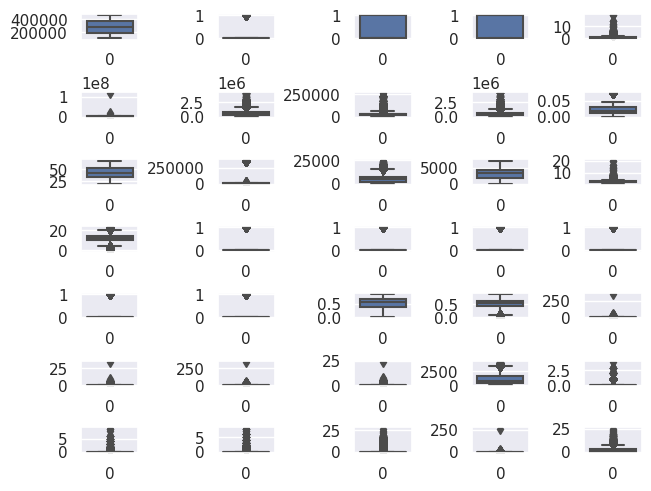

In [ ]:
fig , axes = plt.subplots(nrows=7, ncols=5, constrained_layout=True)
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
for ax, column in zip(axes.flatten(),numerical_col):
    sns.boxplot(applicationdata[column],ax=ax)

---
### **What we got to know from box plot**


1.   The IQR for AMT_INCOME_TOTAL is unusually narrow, with a high number of outliers.
2.   The fact that the third quartile of AMT_CREDIT is bigger than the first quartile indicates that the third quartile contains the majority of the credit amount for client loans. And AMT_CREDIT contains a significant amount of outliers.
3.  There are several outliers, and the third quartile of AMT_ANNUITY is somewhat greater than the first quartile.
4.  Boxplot for DAYS_EMPLOYED, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON,  AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEAR are quite thin and have a lot of outliers.
5. We may infer from the boxplot of CNT_FAM_MEMBERS that the majority of clients have four family members. There are some outliers in the data.
6. DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don't have any outliers.
7. IQR is quite low for DAYS EMPLOYED.Below 25000, the majority of the outliers may be found. Also 375000 outlier is present.
8. In comparison to the first quartile, the third quartile of the column namely AMT_GOODS_PRICE, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE is bigger and contains more outliers.
9. FLAG_OWN_CAR: Since the values are inside the IQR and the first and third quantiles are absent, we can say that the majority of the clients own cars.
10. FLAG_OWN_REALTY: We may infer that the majority of clients own a house or flat because it lacks the first and third quantiles and its values fall inside the IQR.

---

###Finding balance percerntage for Target column

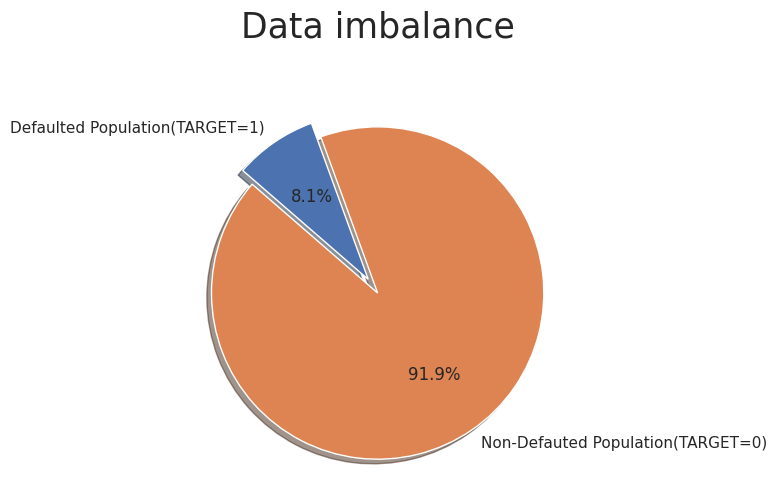

In [ ]:
count1 = 0
count0 = 0
for i in applicationdata['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1

count1 = (count1/len(applicationdata['TARGET']))*100
count0 = (count0/len(applicationdata['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

---

The application data is highly imbalance. Defauled population is 8.1% and non defaulted population is 91.9%.

---

#Age distributaion based on Target 0 and Target 1.

In [ ]:
Target0 = applicationdata.loc[applicationdata["TARGET"]==0]
Target1 = applicationdata.loc[applicationdata["TARGET"]==1]

In [ ]:
round(len(Target0)/len(Target1),2)

11.39

---
##The Imbalance ratio is "11.39"

---

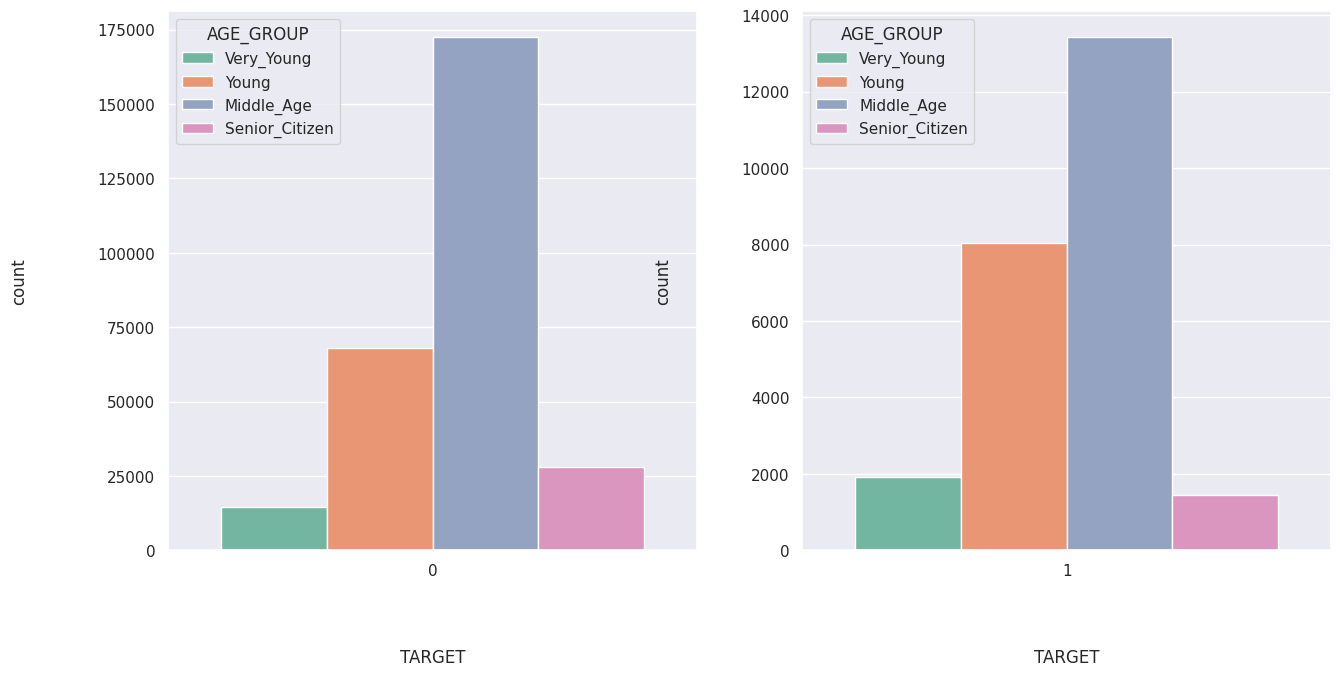

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

---
From the above Bar graph, we can observe that,
1. Middle age that is from 35 - 60 seems to the one who applies more fro the loan in both defaulter and non-defaulter.
2. We can also say that, middle age group faces the most difficulties for repaying the loan
3. But in case of senior citizen and Very Young group faces the least challenges as compared to other age groups.

---

#Gender based on Target Values

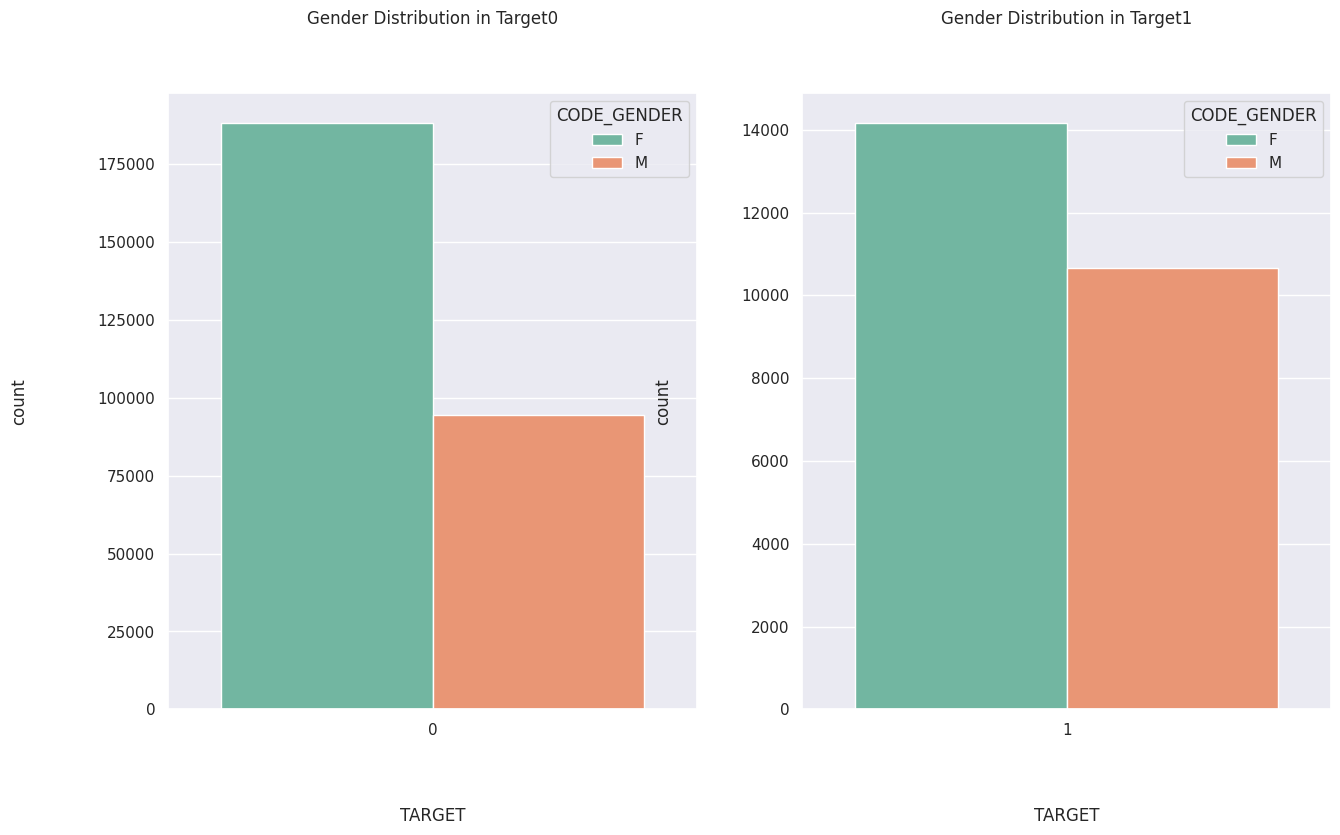

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

---
From the above Bar graph and data, we can say :

1.   No. of female client apllies for loan more as compare to the male clients.
2.   About 66.6% Female clients are non-defaulter while only 33.34 Male clients are non-defaulter.
3. 57% of Female client are defaulter while only 43% of Male clients are defaulter.

---

###Organization distribution based on target values

<Figure size 4000x500 with 0 Axes>

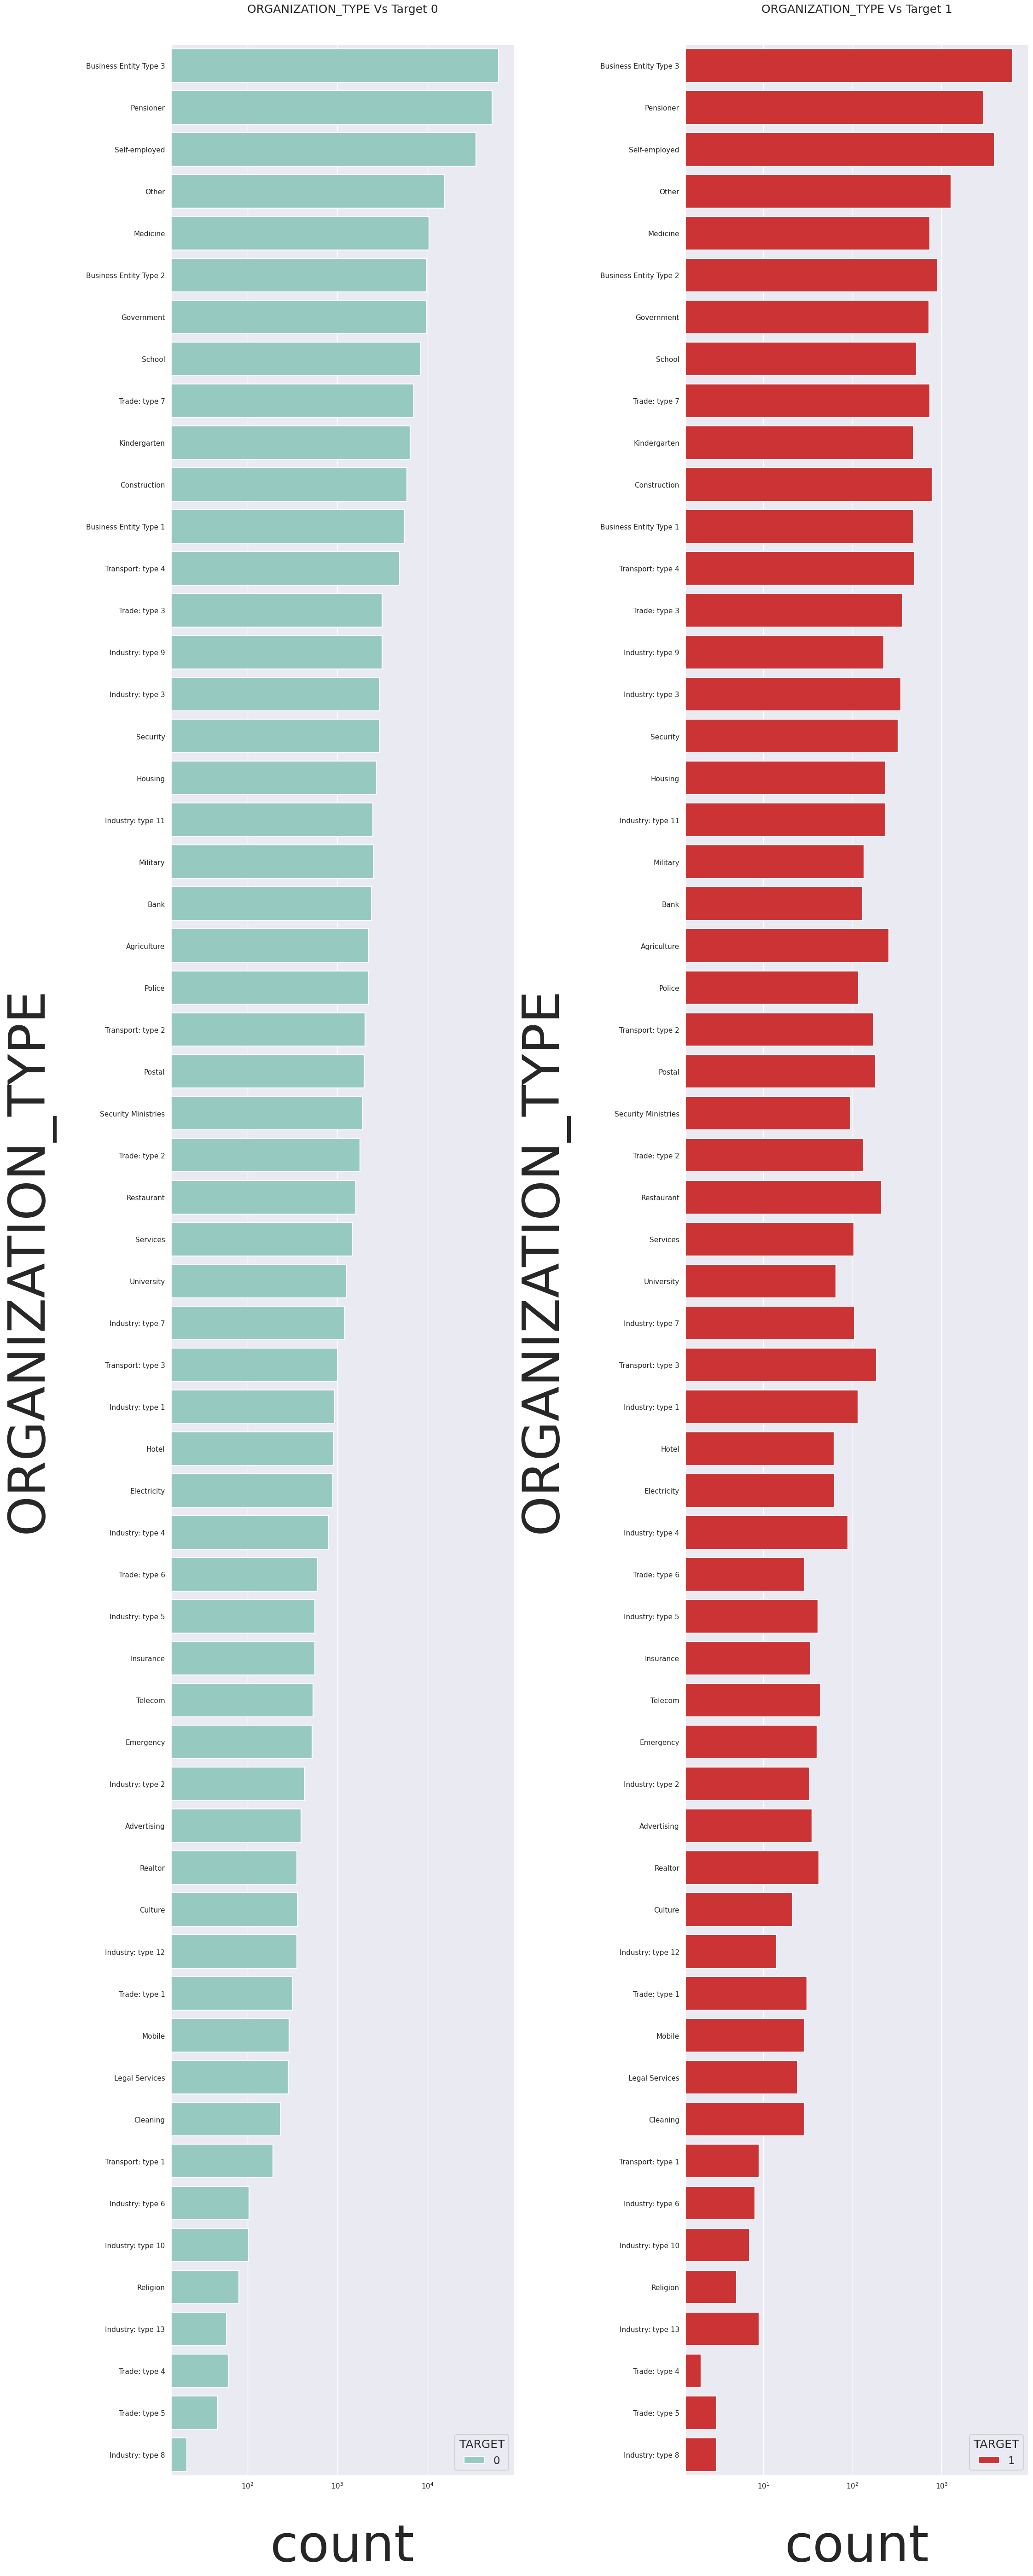

In [ ]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3)


plt.subplot(121)
plt.xscale('log')
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=applicationdata['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=applicationdata['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

---
We can say that :

Client of BUSINESS ENTITY TYPE 3, SELF EMPLOYED, OTHER, MEDICINE, GOVERNMEMNT, BUSINESS ENTITY TYPE 2 from ORGANIZATION_TYPE applied the most for the loan as compared to other type (Defaulter and non-defaulter)

---

#Now lets see for categorial column

## This are the column to be compared off
['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'AMT_INCOME_TYPE', 'AMT_CREDIT_TYPE']

In [ ]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))

    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET')
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)


    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()


In [ ]:
categorical_col = list(applicationdata.select_dtypes(include= 'category').columns)
categorical_col.remove('ORGANIZATION_TYPE')
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')
categorical_col

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

TypeError: ignored

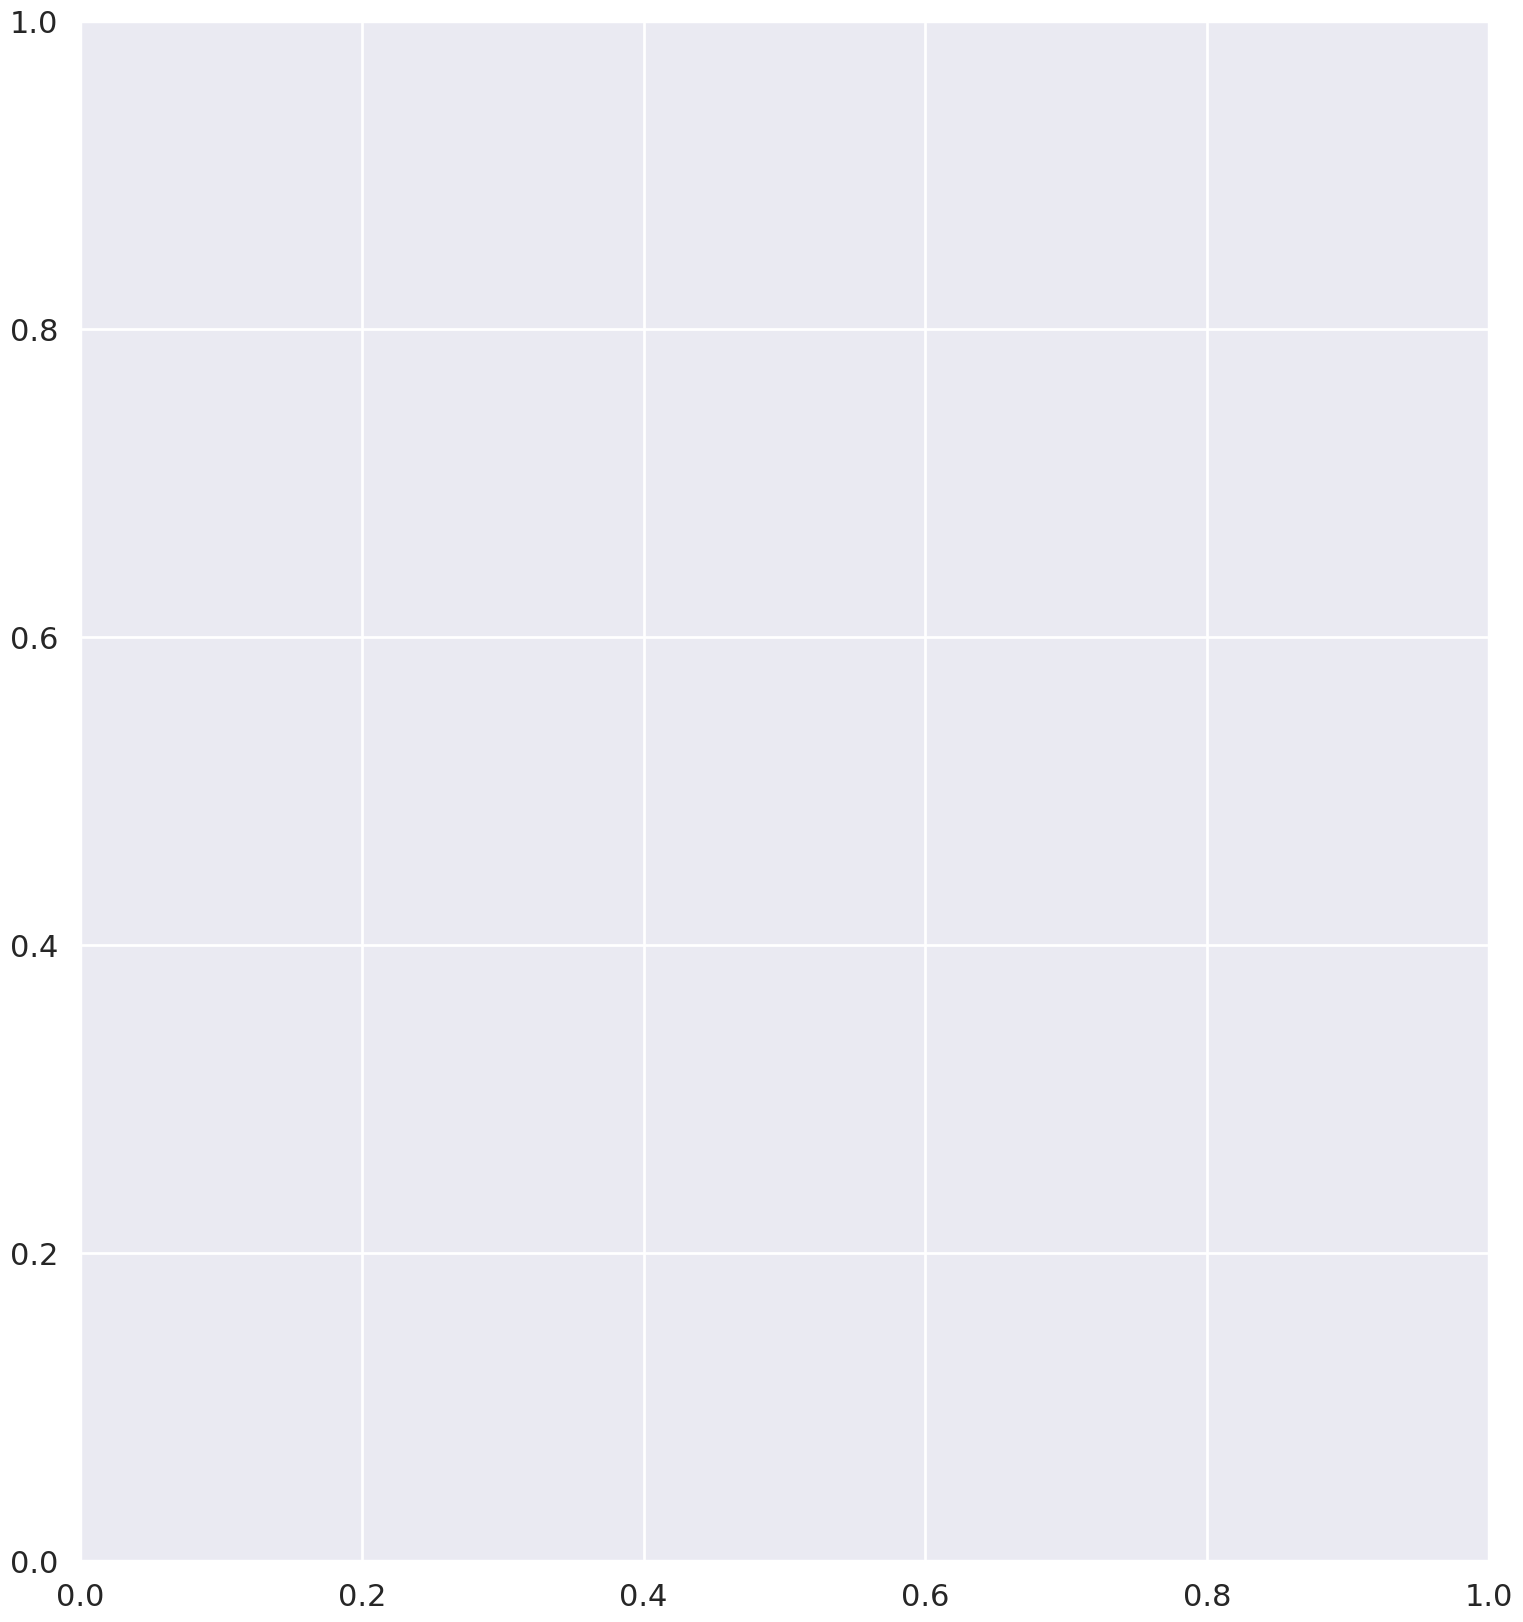

In [ ]:
for i in categorical_col:
  categorical_plot(i)

---
From the above plot, we can say:
1. NAME_CONTRACT_TYPE
* MOst of the client have applied for cash loan while very small proportion have applied for Revolving loan for both.
2. NAME_TYPE_SUIT
* Most of the accompanied while applying for the loan and with few client a family member was accompanying for both.
* But for the one who was accompanying client while applying for the loan doesn't impact on the default. Also both have same proportion.
3. NAME_INCOME_TYPE
* Clients such as Working,Commercial associate and Pensioner are more like;y to apply for loan.
* Businessman, students and Unemployed are less likely to apply for loan .
* Working have more risk to default.
* State servant is at Minimal risk to default.
4. NAME_EDUCATION_TYPE
* Clients having education Secondary or Secondary special are more likely to apply for the loan.
* Clients having education secondary or secondary special are having more risk to the default as compare to other.
5. NAME_FAMILY_STATUS
* Married clients appear to apply for the loan for default and non-defaulter of them the most.
* Client being single relationship are less risky and widower shows minimal risk. (Defaulter)
6. NAME_HOUSING_TYPE
* The chart makes it evident that most clients, both defaulters and non-defaulters, own a home or reside in a flat.
7. OCCUPATION_TYPE
* Pensioners are mostly going to apply for the loan and are highly risky.(Defaulter and non-defaulter)
8. WEEKDAY__APPR_PROCESS_START
* There is no considerable difference.
9. AMT_INCOME_TYPE
* Client having medium salary range are more likely to aply for the loan.
* CLient with low and medium salary are more risky.
10. AMT_CREDIT_TYPE
* Clients who apply for High and Low credit are at the high risk.
* Medium credit amount of the loan is chossen more by client for both defaulter and nomn defaulter.

---

#Univariate analysis of numerical column with target values

In [ ]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))


    plt.subplot(1,2,1)
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)




    plt.subplot(1,2,2)
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)

    plt.show();


###Price of Good based on target

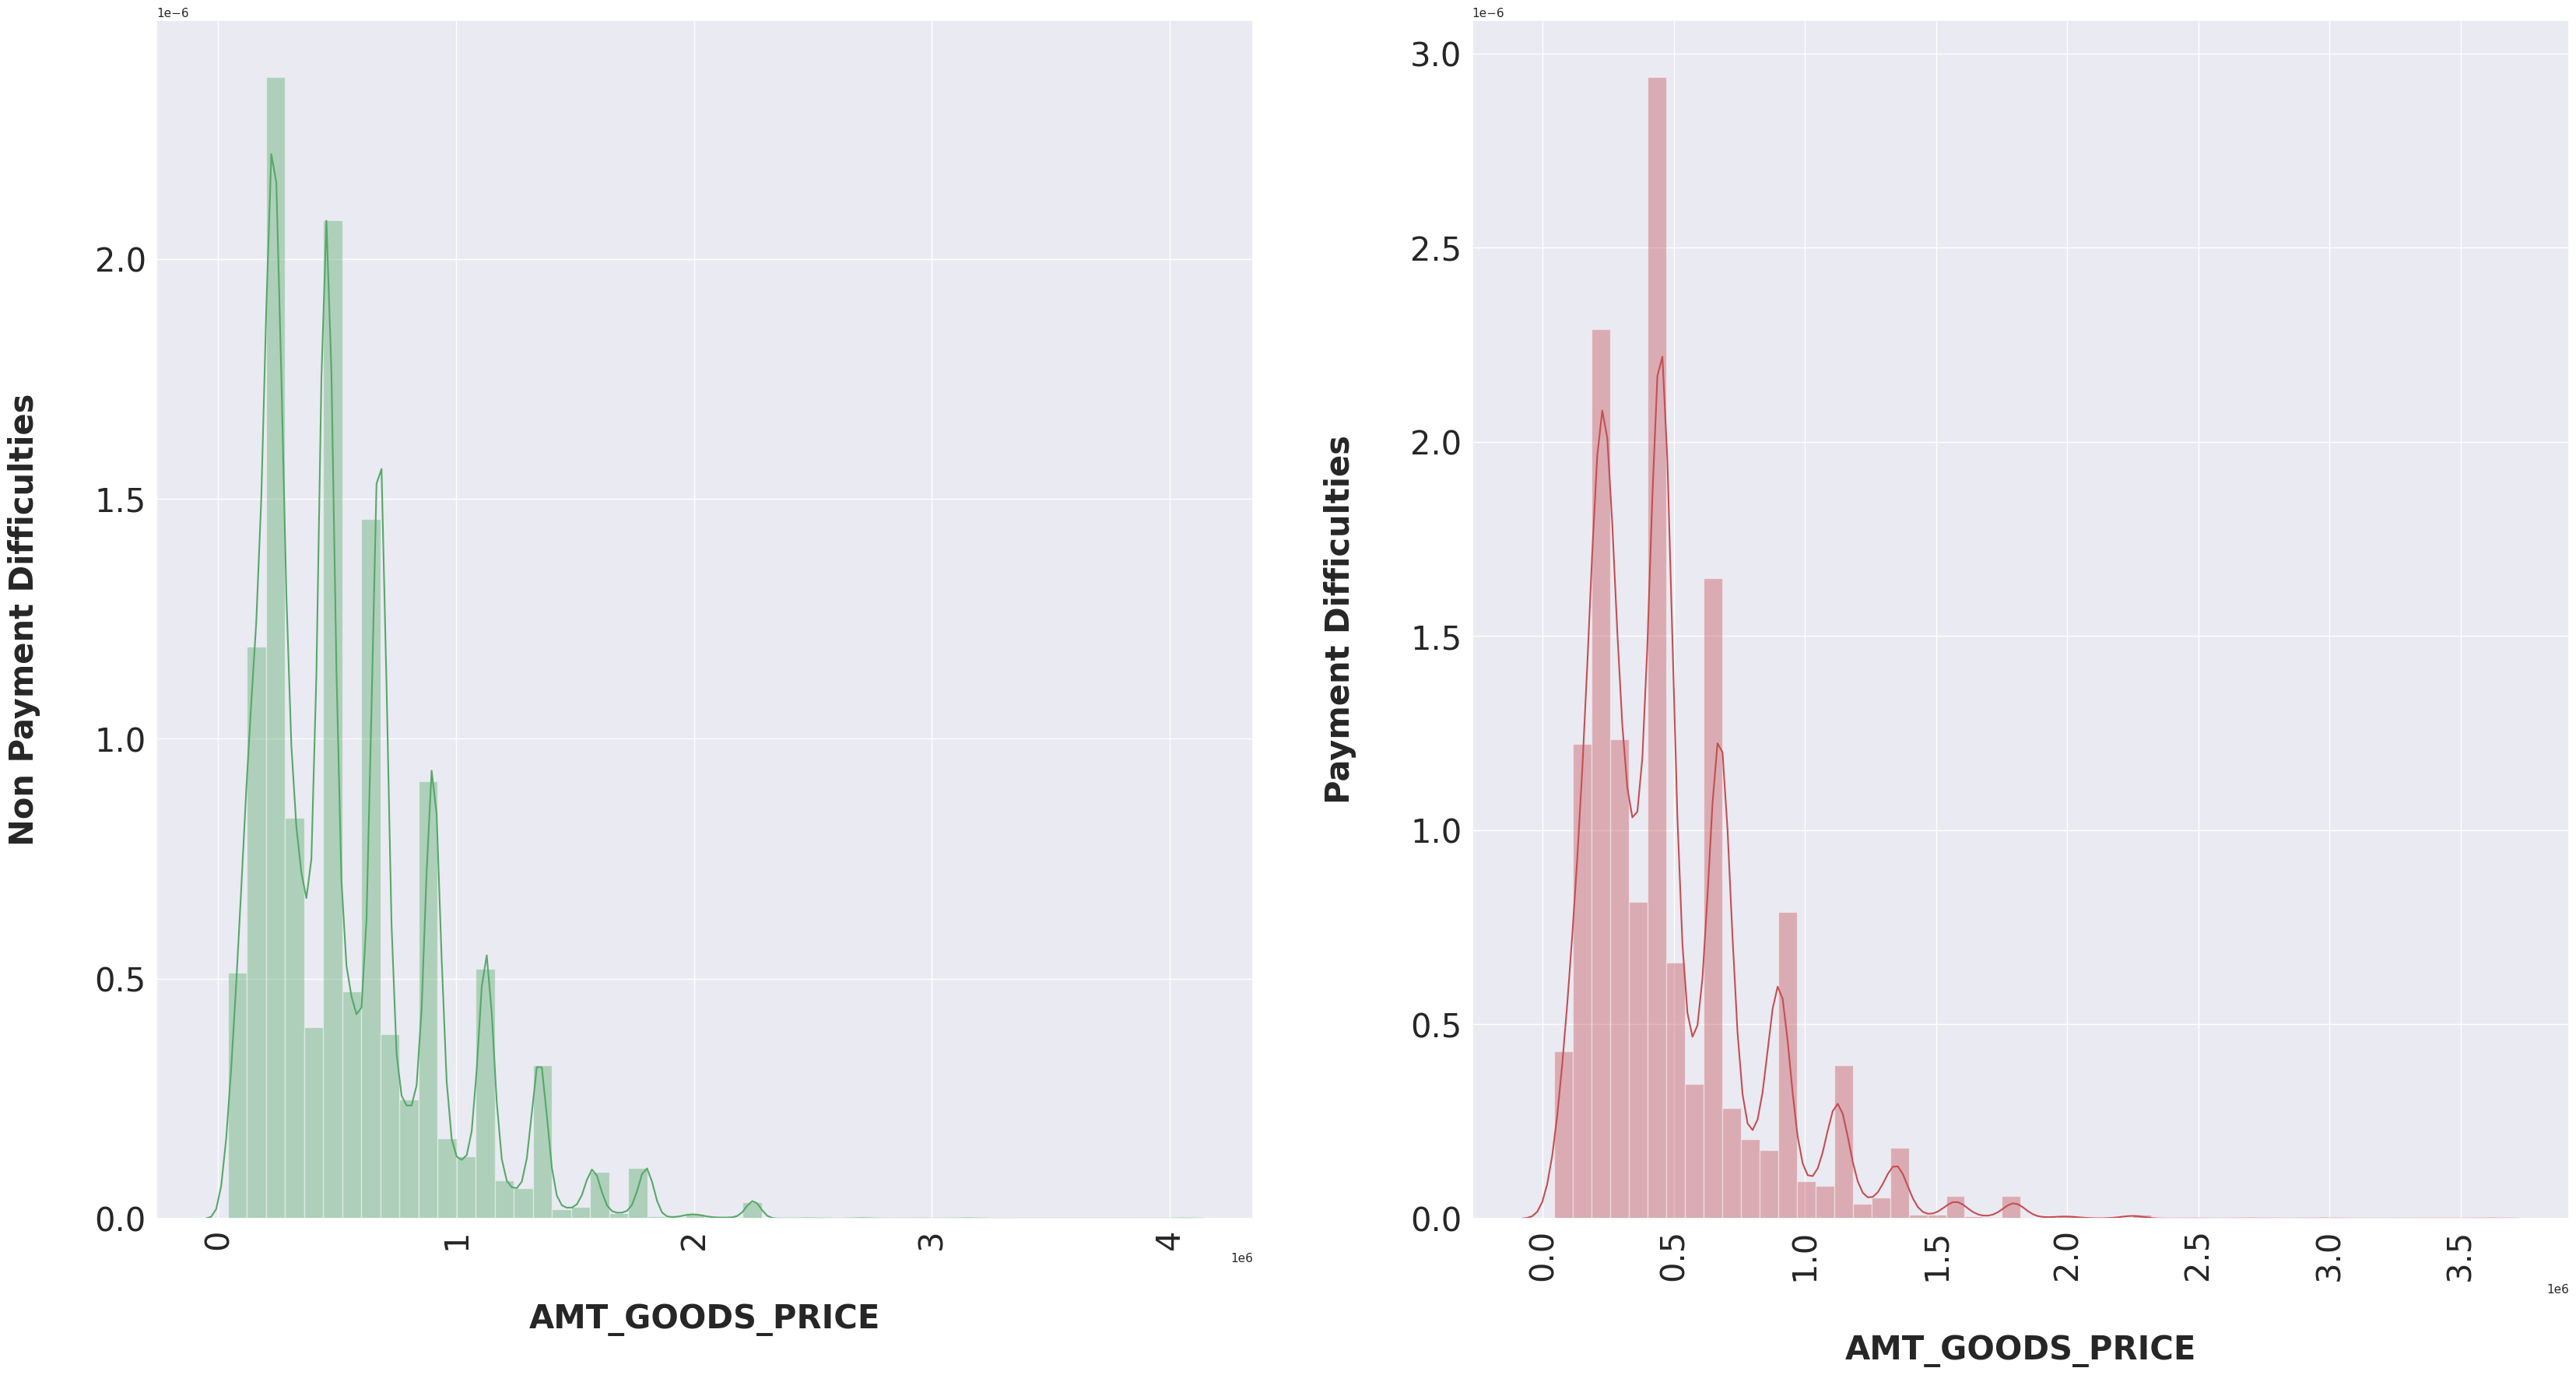

In [ ]:
uni(col='AMT_GOODS_PRICE')

###Loan Annuity based on target

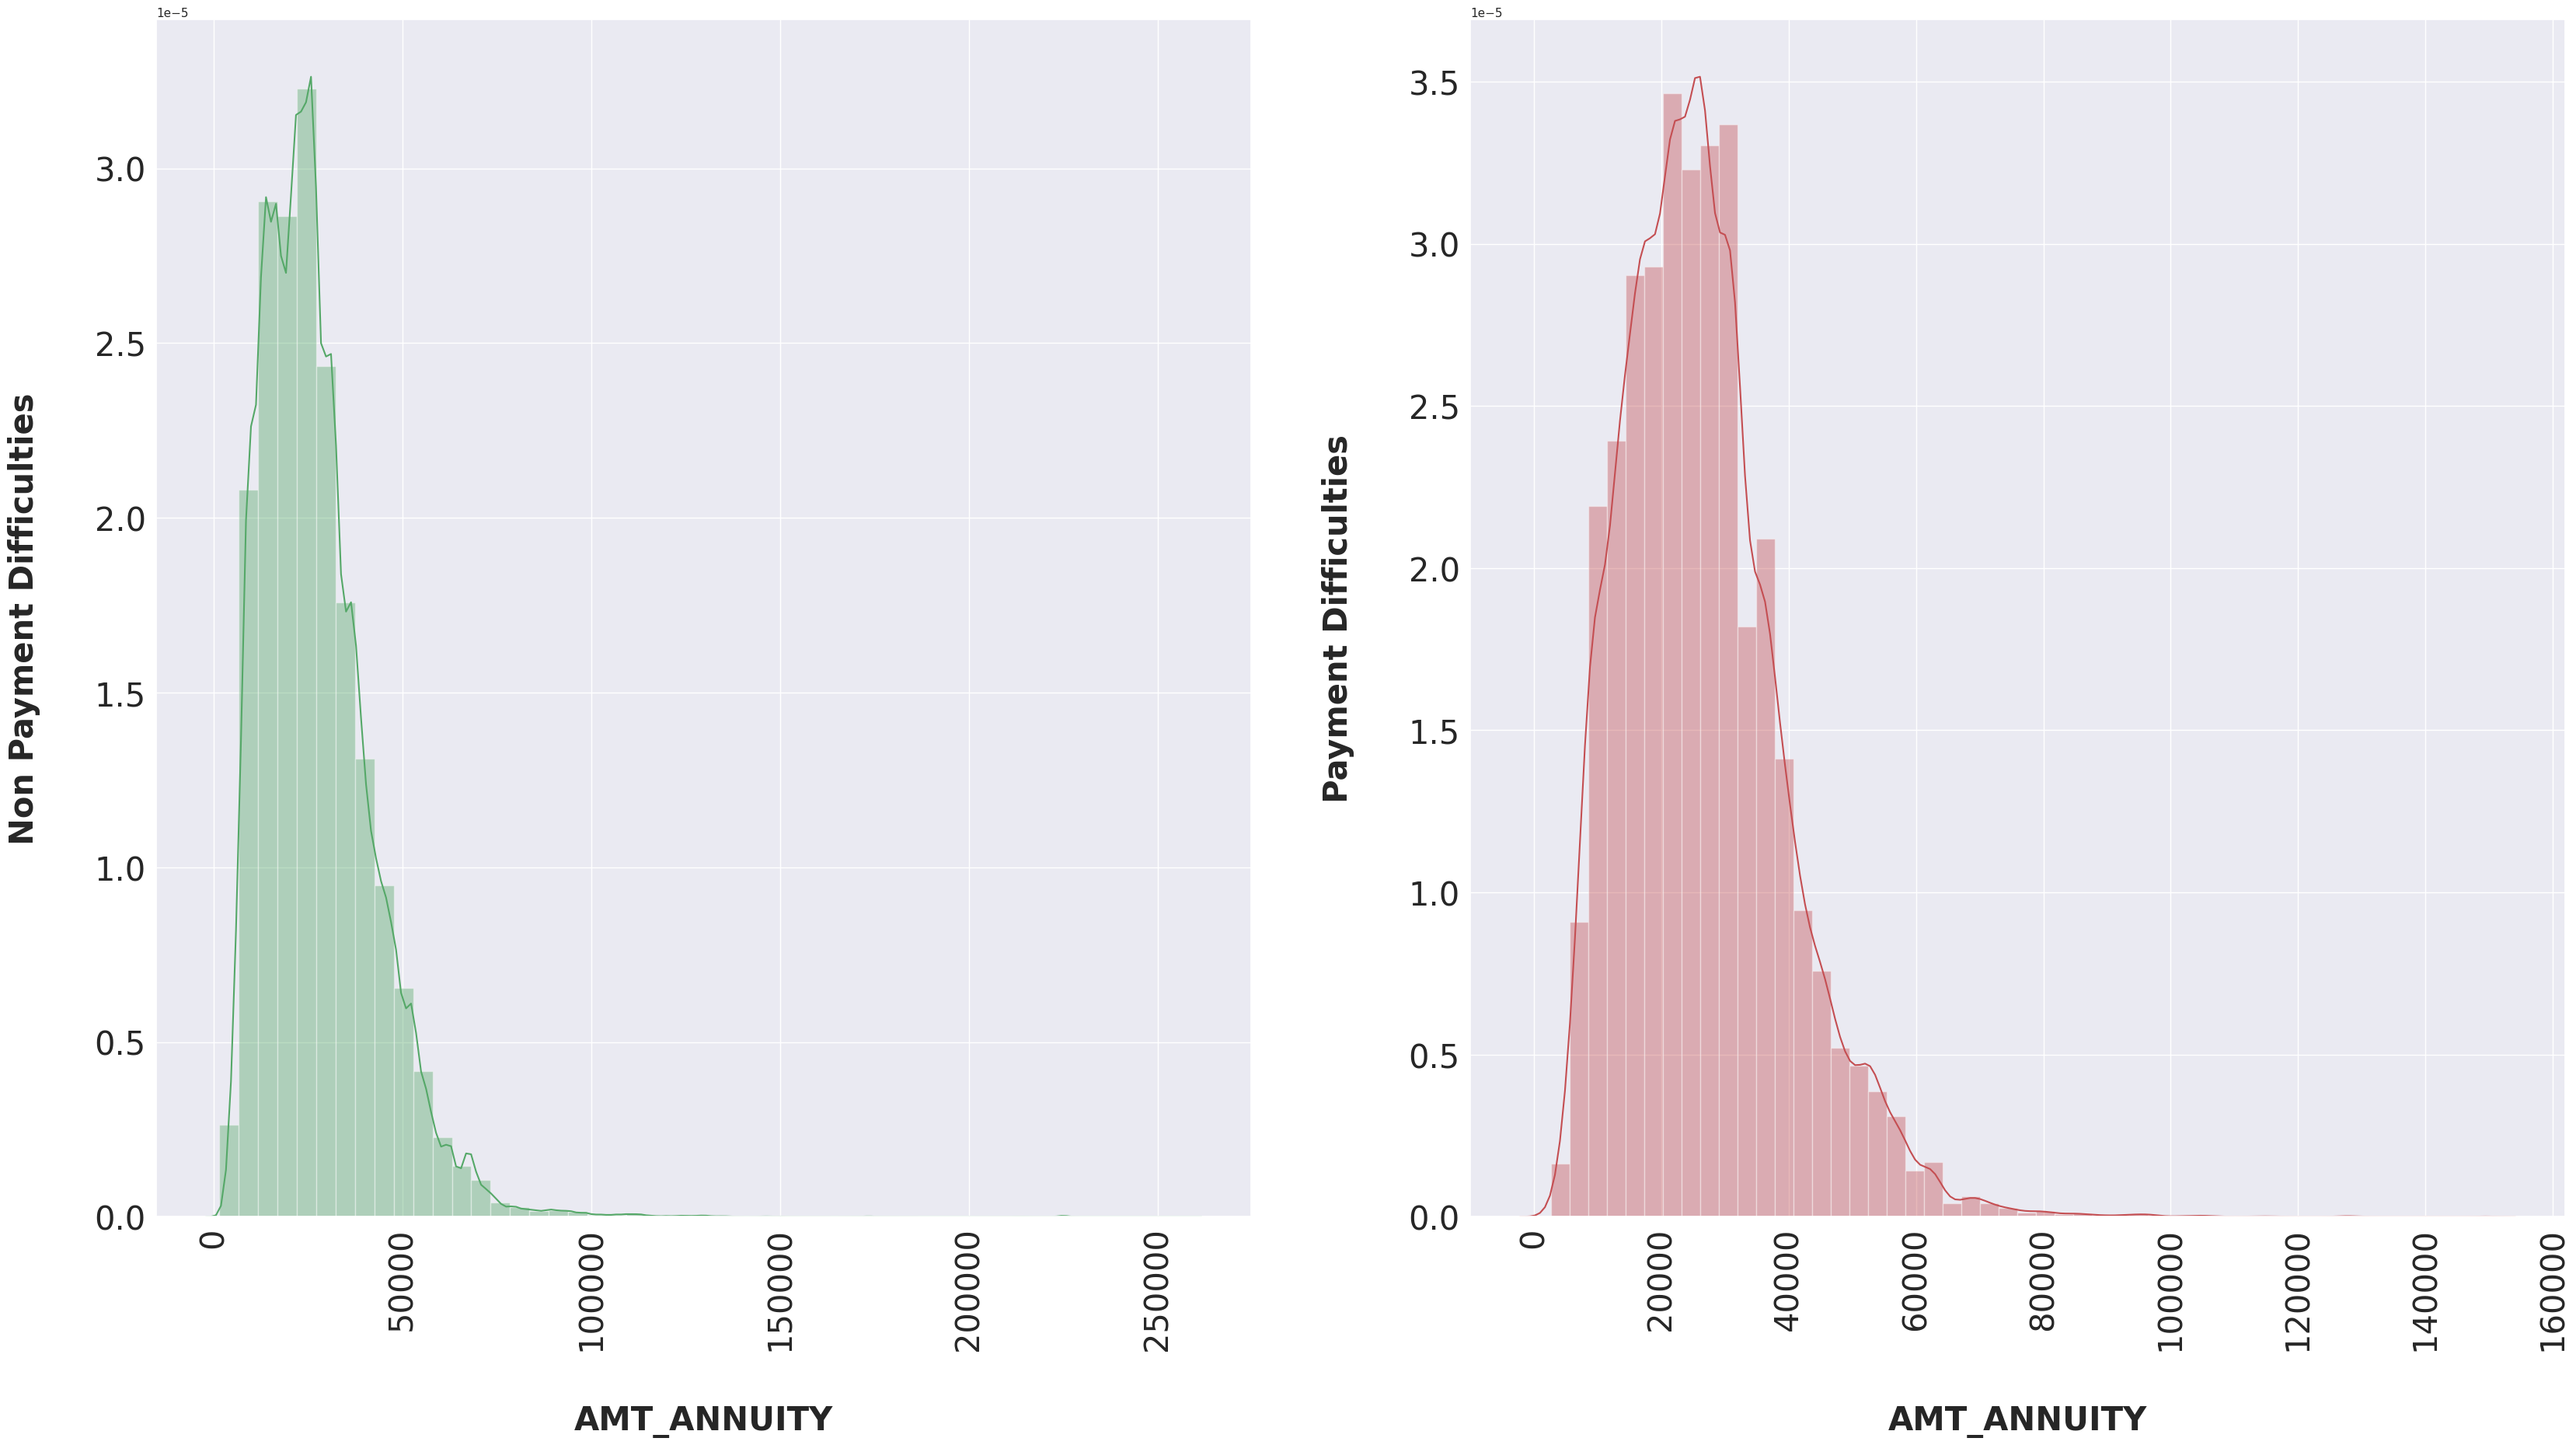

In [ ]:
uni(col='AMT_ANNUITY')

###Credit amount based on target

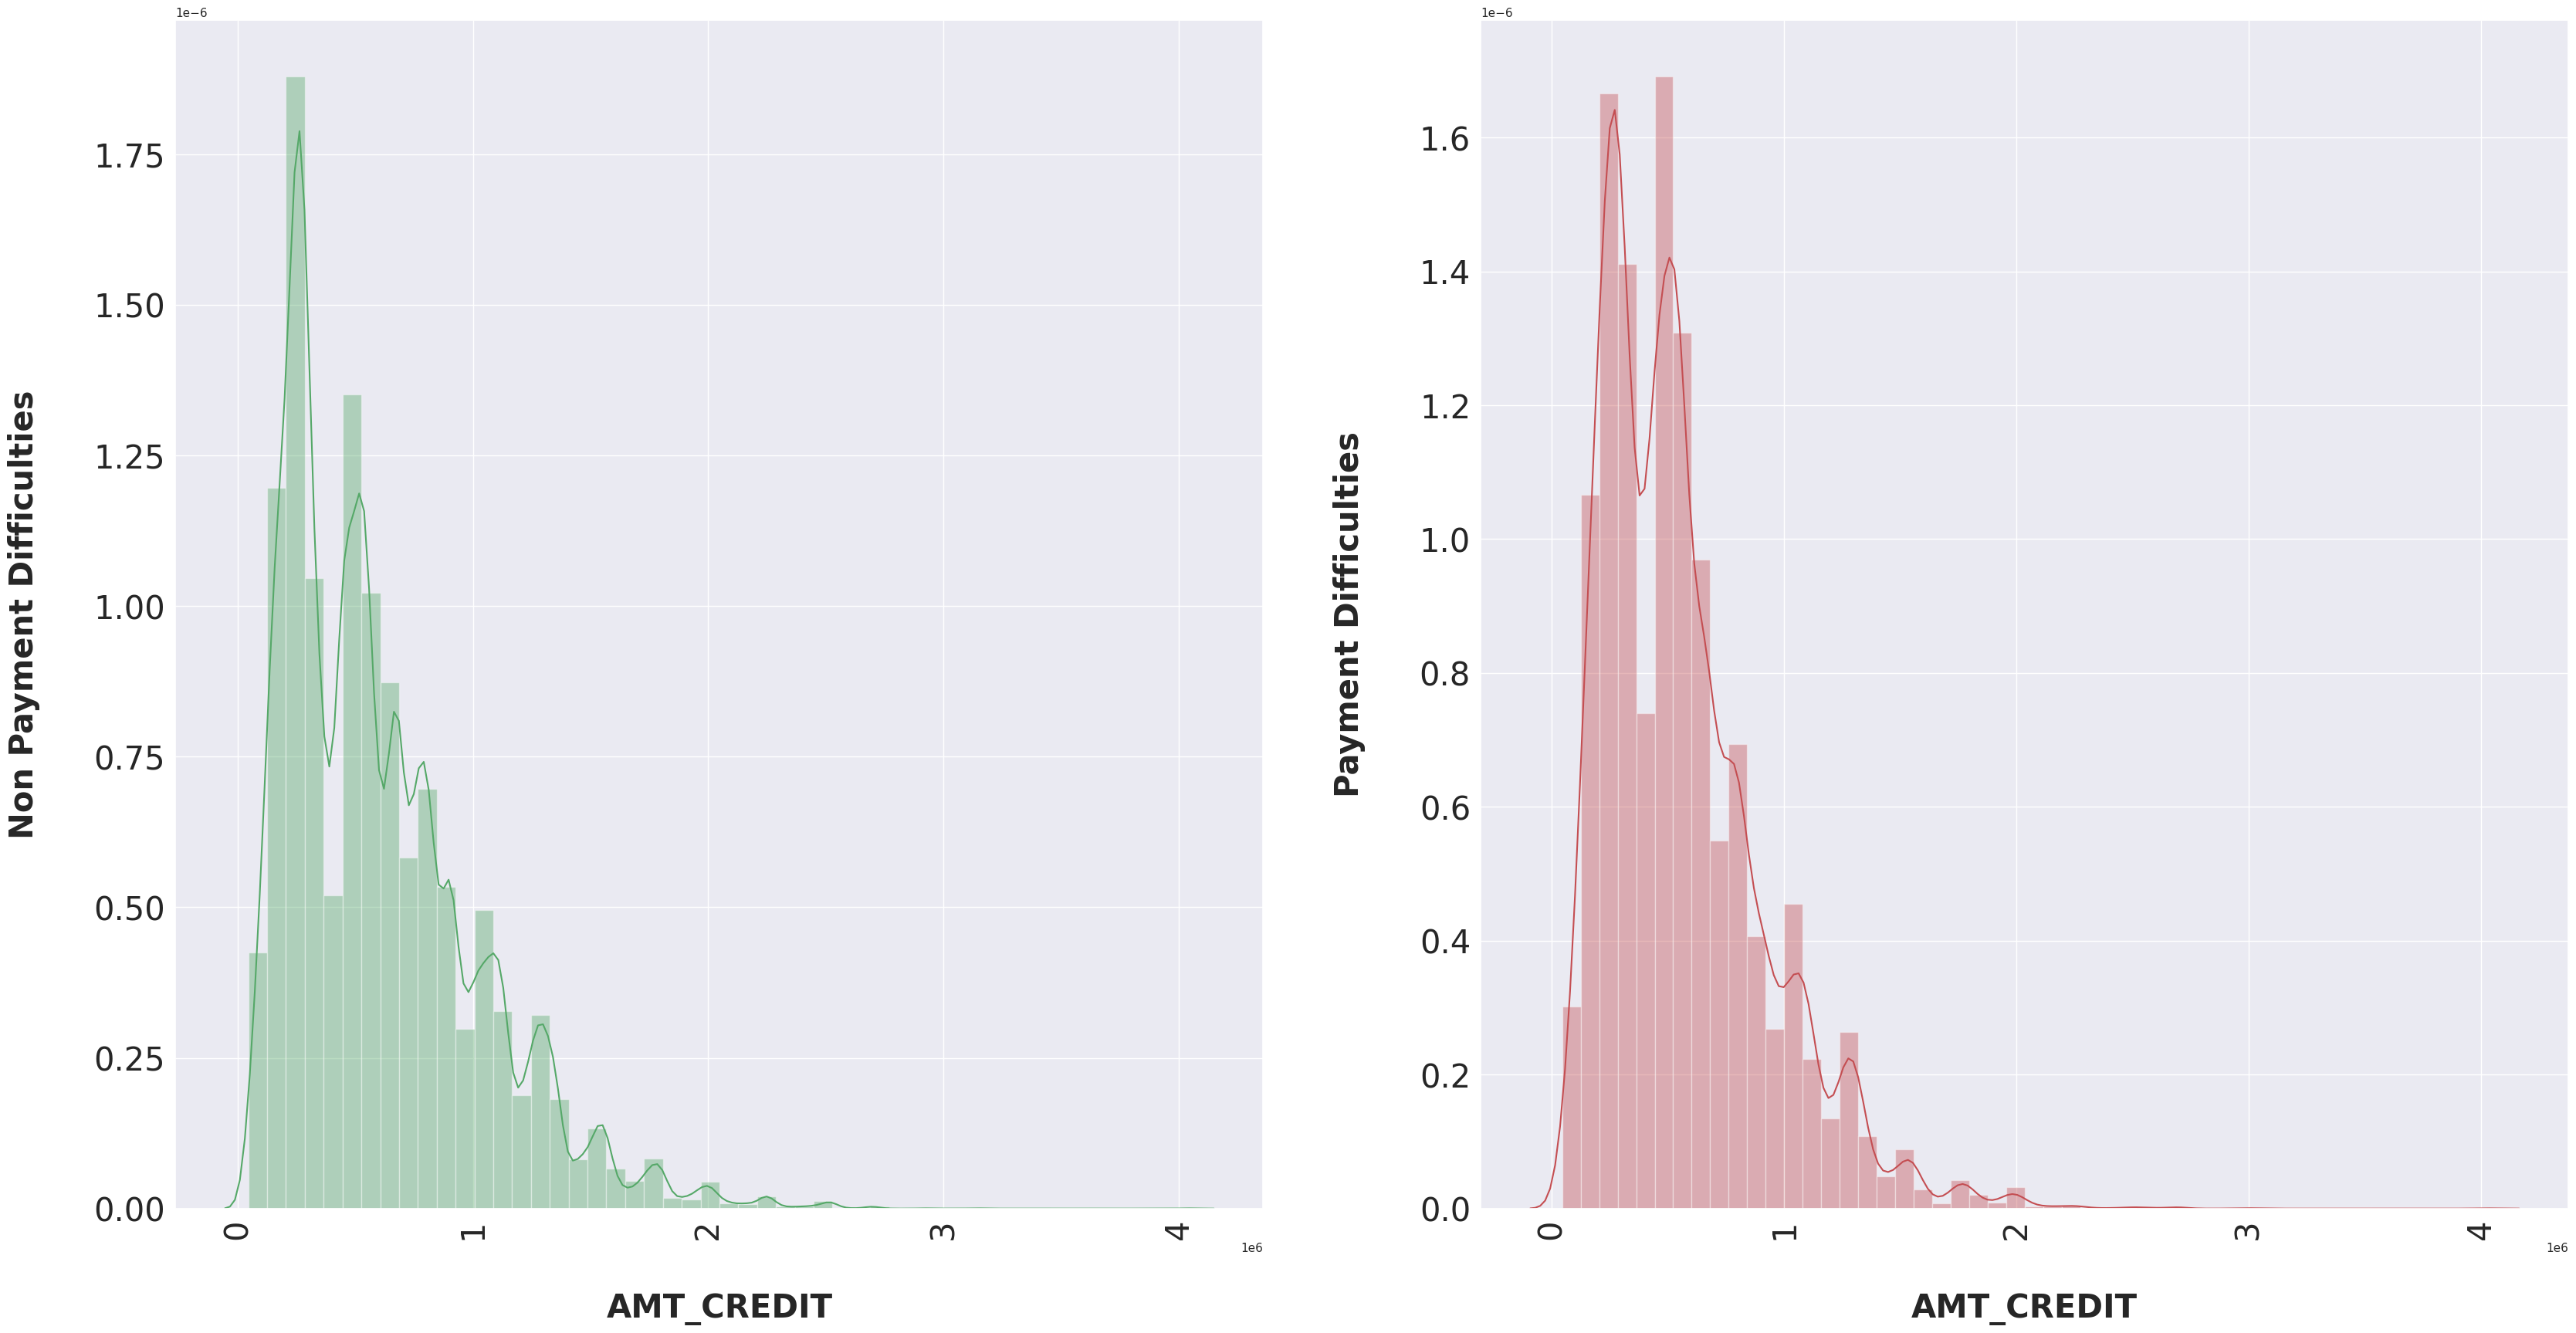

In [ ]:
uni(col='AMT_CREDIT')

###Amount income total based on target

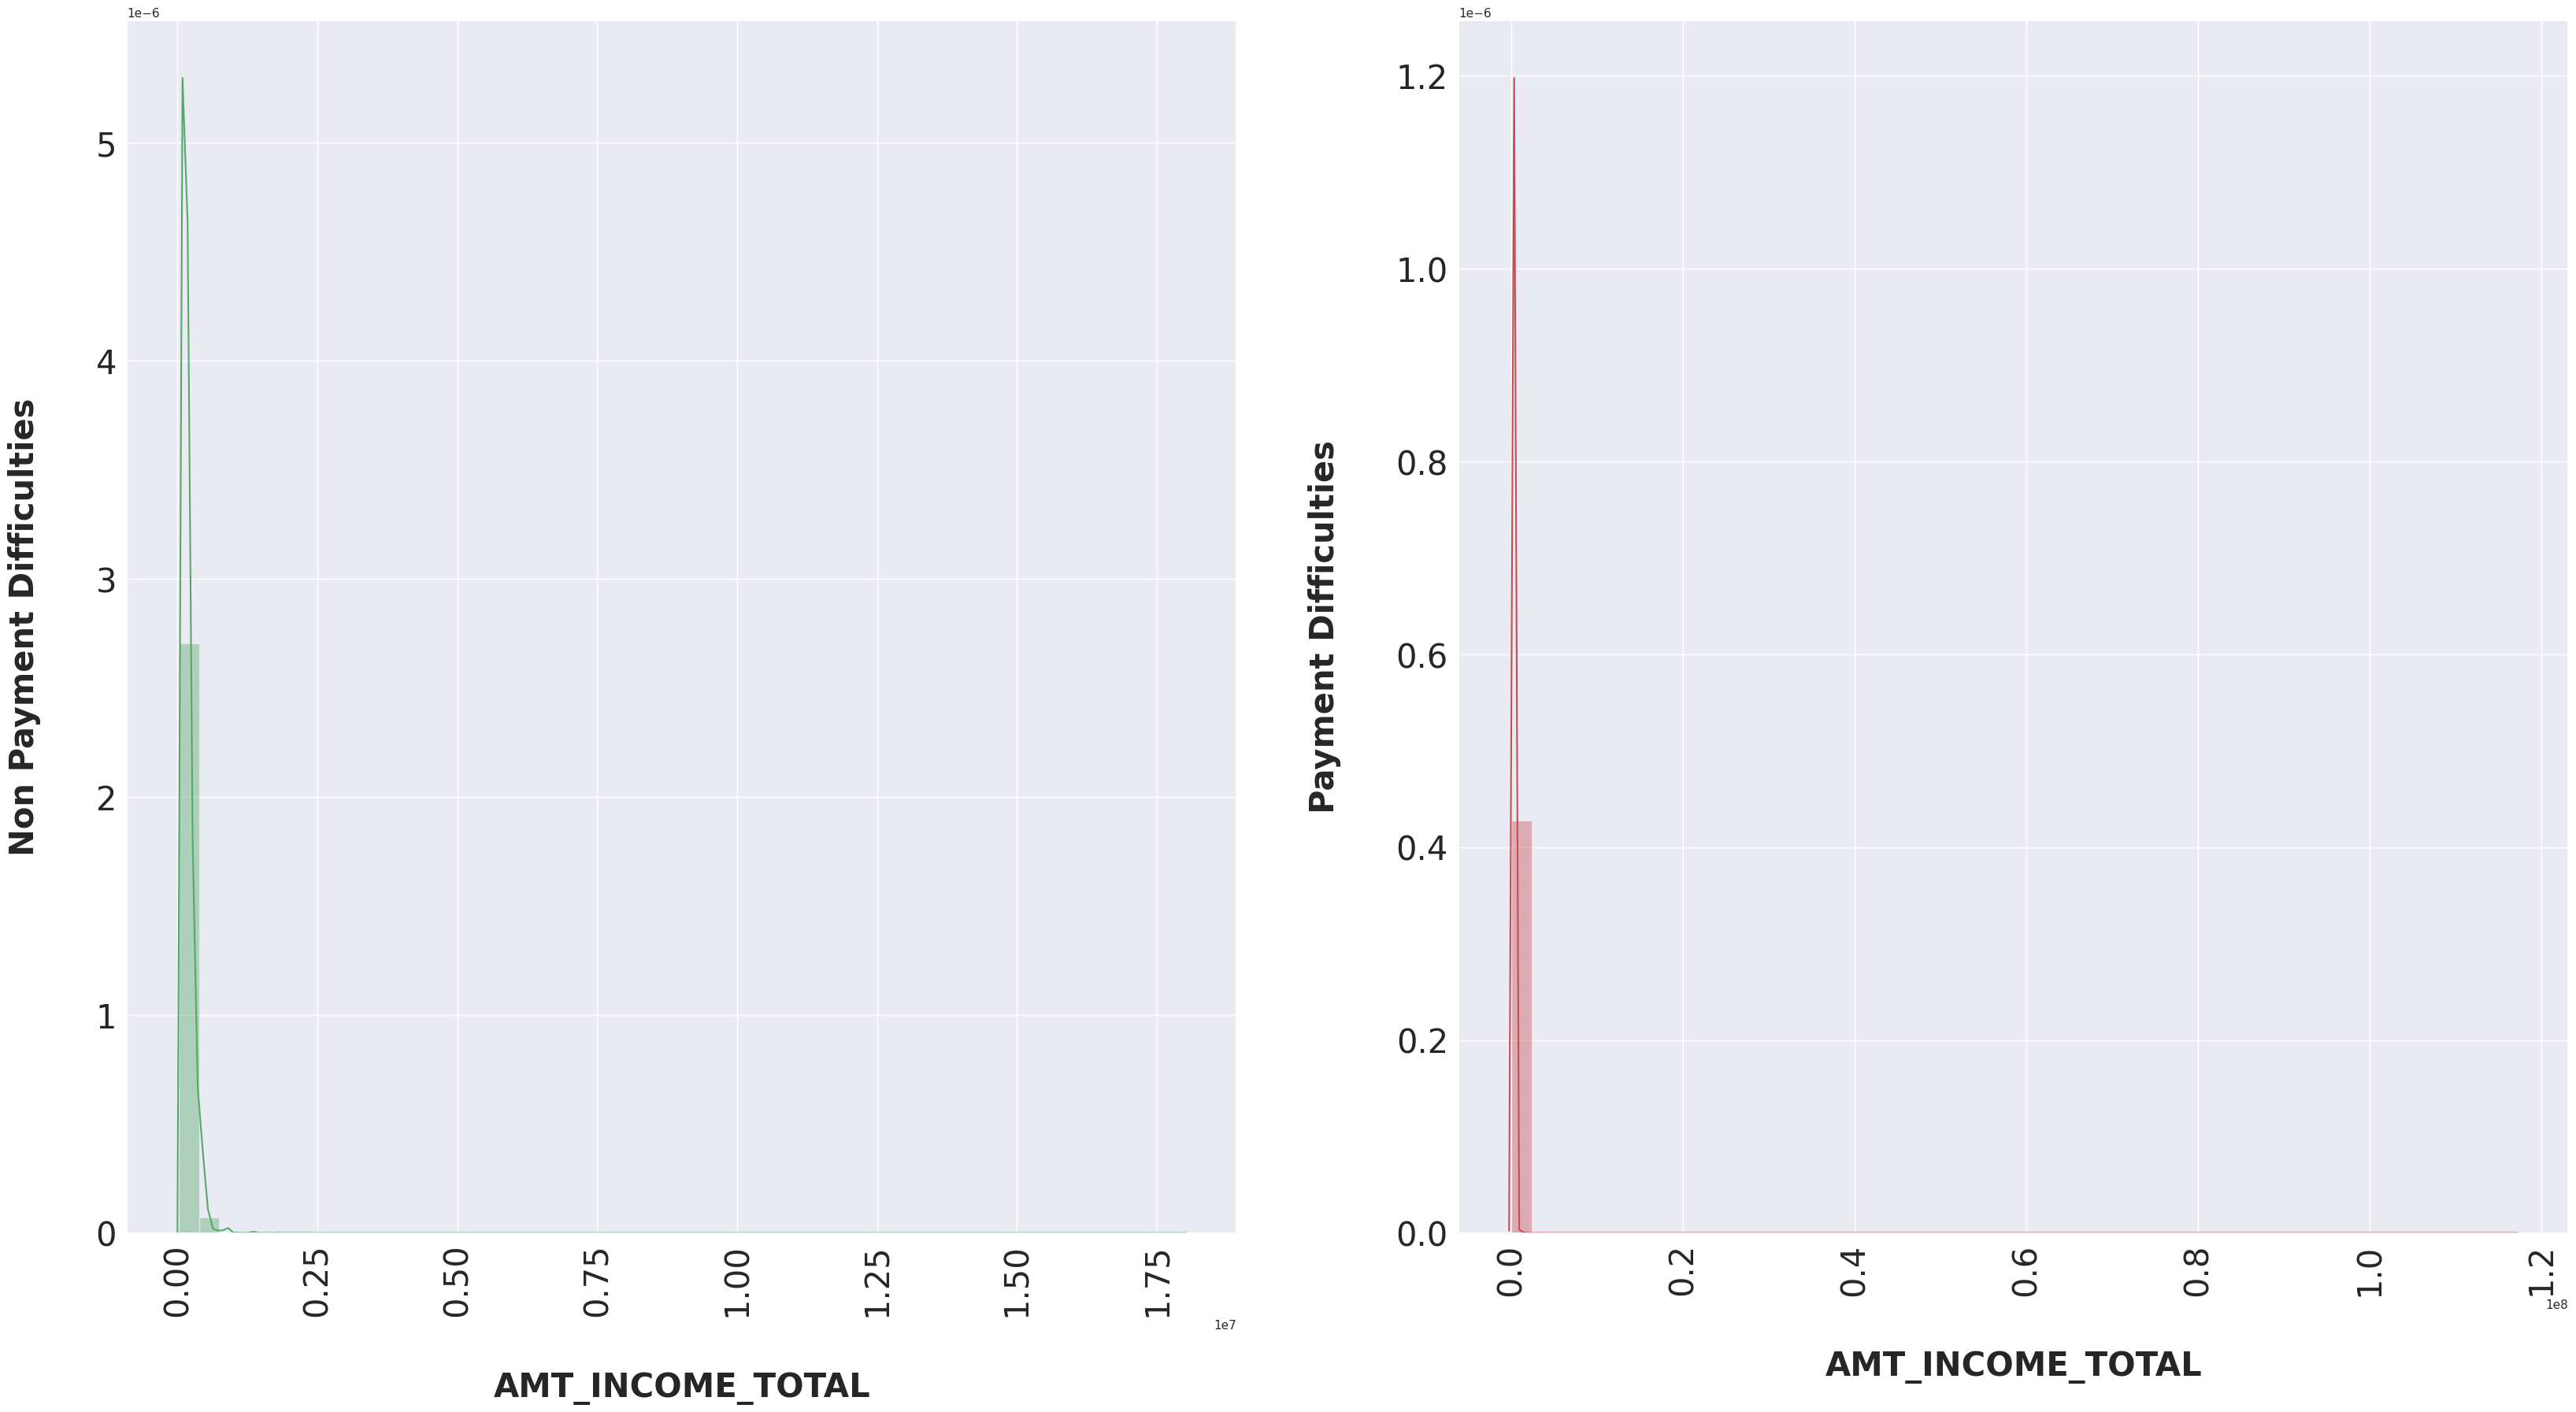

In [ ]:
uni(col='AMT_INCOME_TOTAL')

---
What we get from above plots,
* Compared to target 0, those with target 1 have significantly more staggered income.
* The distance plot clearly demonstrates that the shapes of the income total, annuity, credit, and good price for targets 0 and 1 are identical.
* The plots also emphasise that those who struggle to repay loans due to their income, loan amount, cost of the commodities used to secure the loan, and Annuity.
* The difference in the figure shows that Target 1 has a larger curve shape than Target 0, which has a smaller curve shape with clearly defined boundaries.

---

Bivariate Analysis of numerical and catagorial column with Target.

In [ ]:
applicationdata[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

##For Target 0

###Above mention columns are compare in below plots.

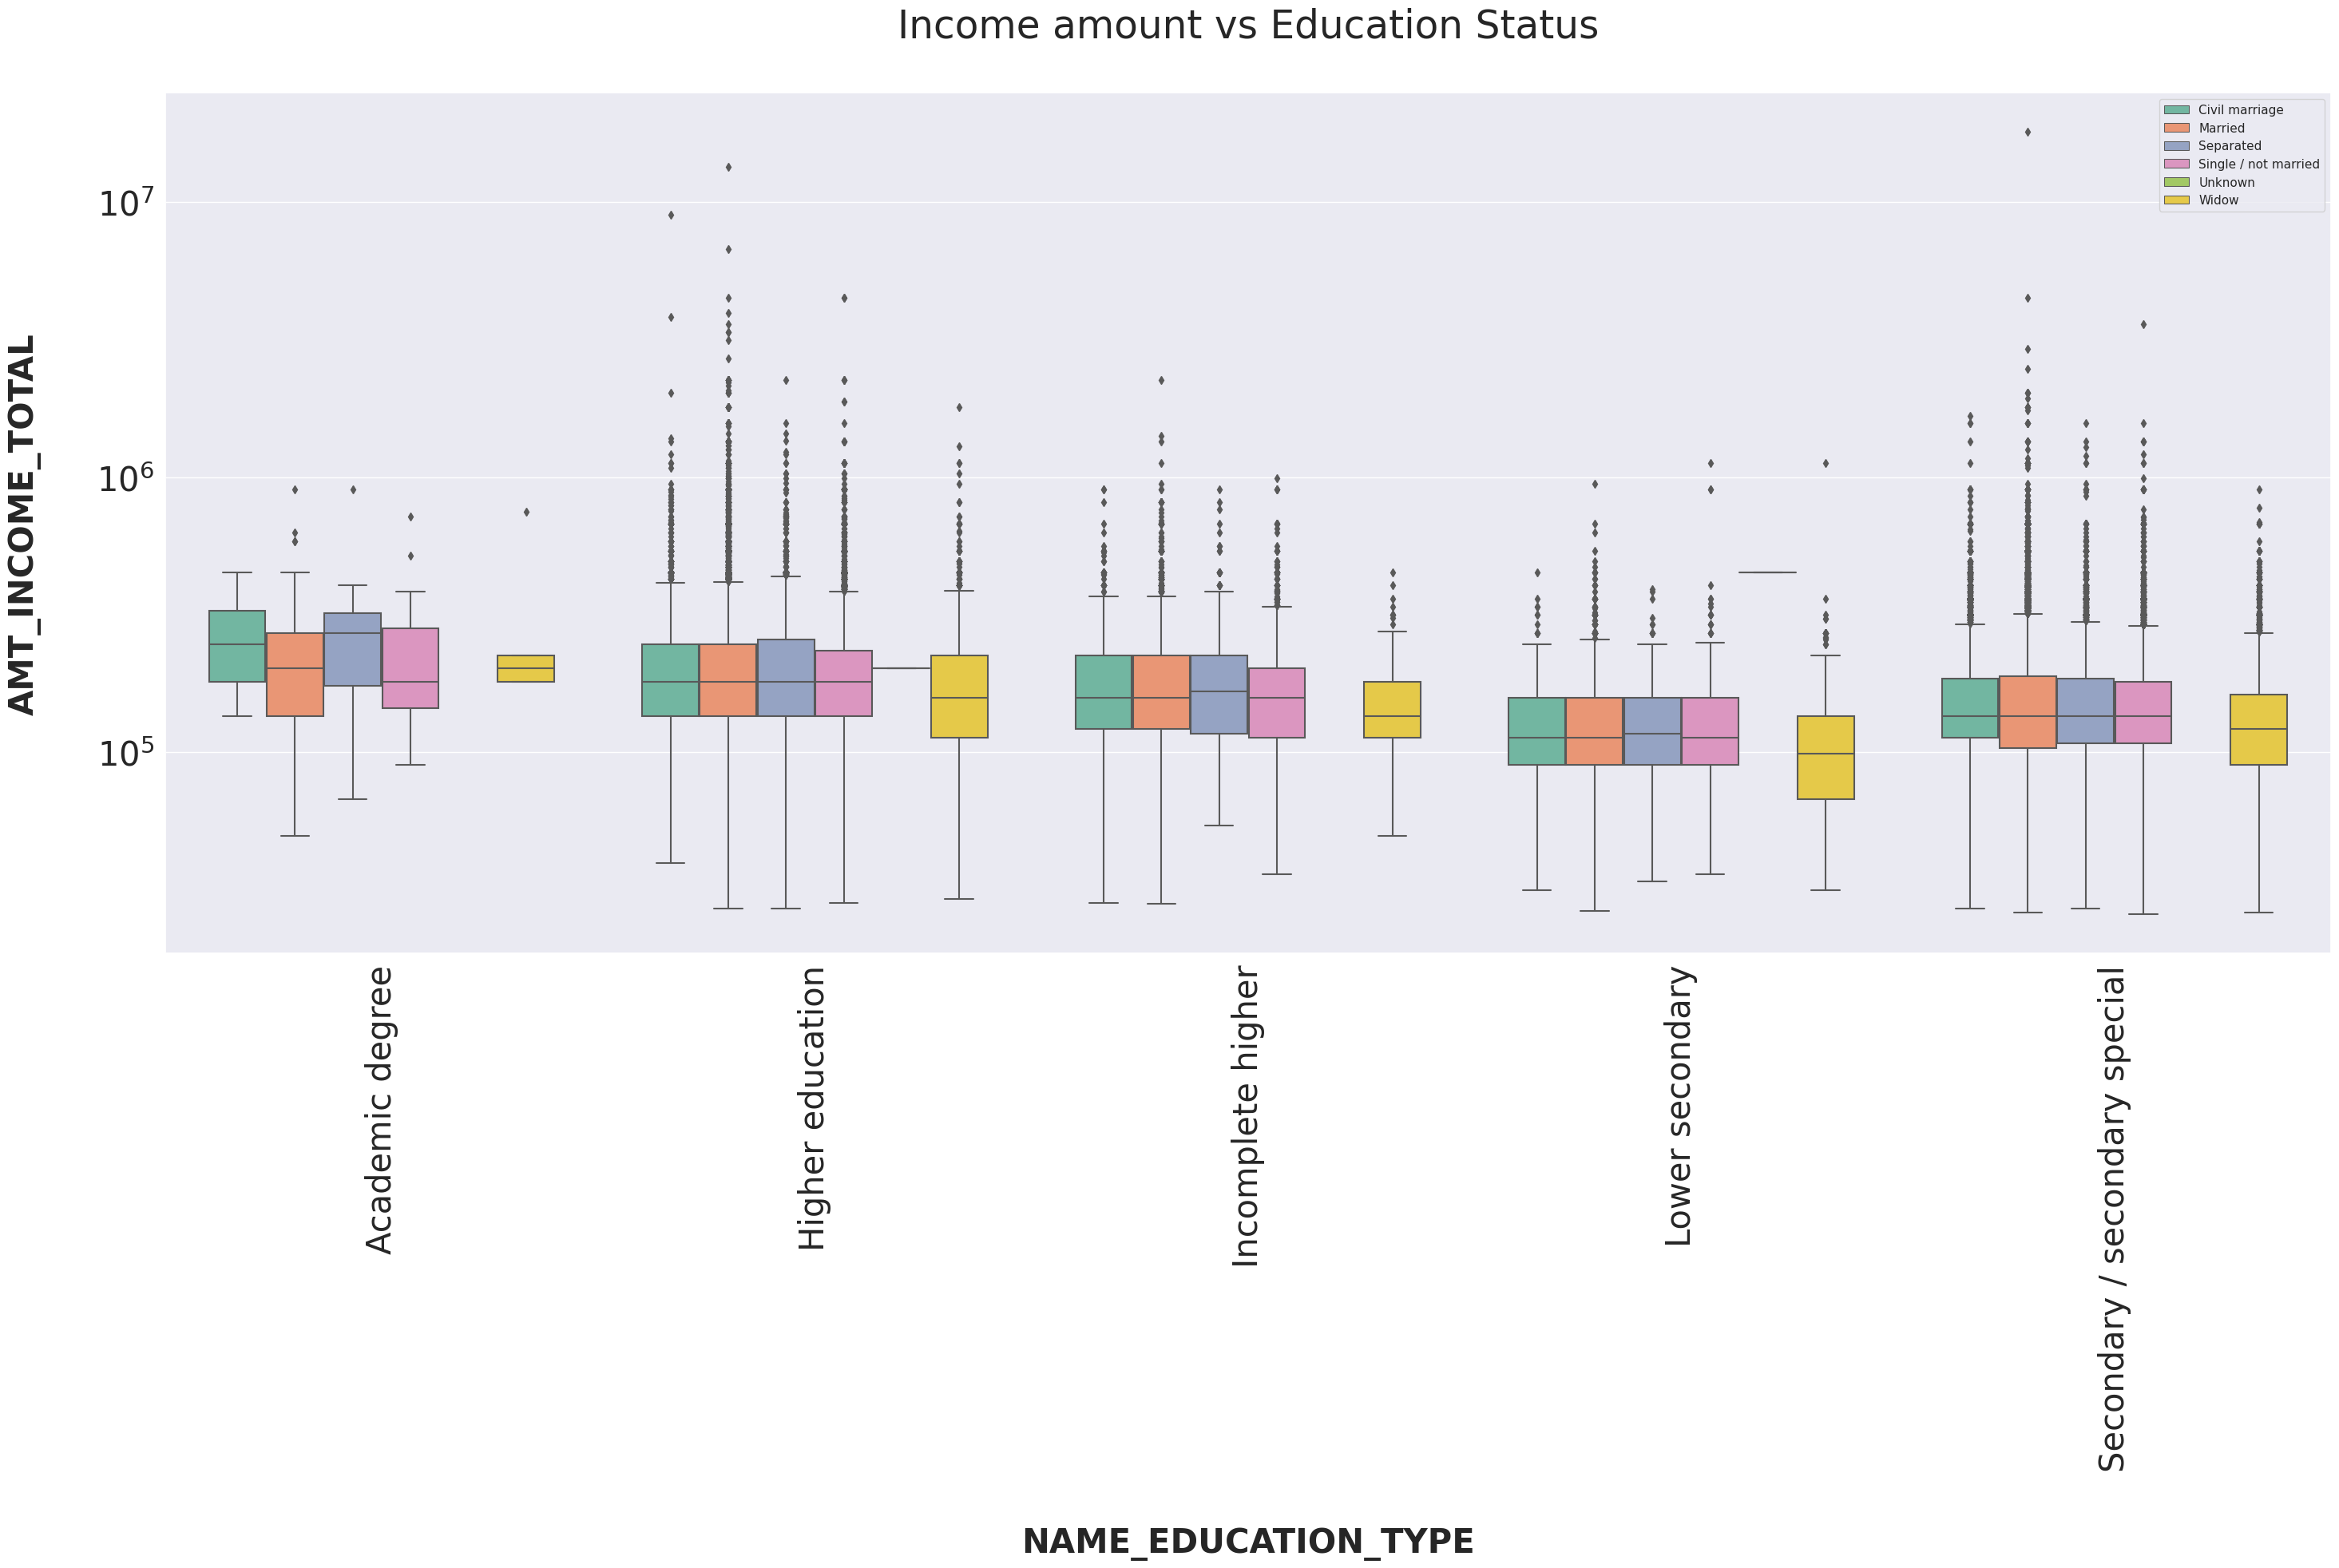

In [ ]:
plt.figure(figsize=(35,14))
plt.yscale('log')
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

---
What we got from aboce graph,
* Widow Clients with academic degrees don't fall into the first or third quartile and only have a small number of outliers. Additionally, compared to clients with acadamic degree, and all family statuses have a relatively low level of outliers.
* Clients' incomes, regardless of family background or kind of education, are 25% or less below the first quartile.
* Higher education, incomplete education in higher education, lower secondary education, and secondary/secondary special education clients had a larger percentage of outliers.
* According to the above graph, clients with higher education tend to have higher incomes than clients without higher education.
* Despite the fact that certain consumers tend to have better incomes and have not completed their higher education. Some of the clients who have completed secondary or secondary special education typically make more money.

---

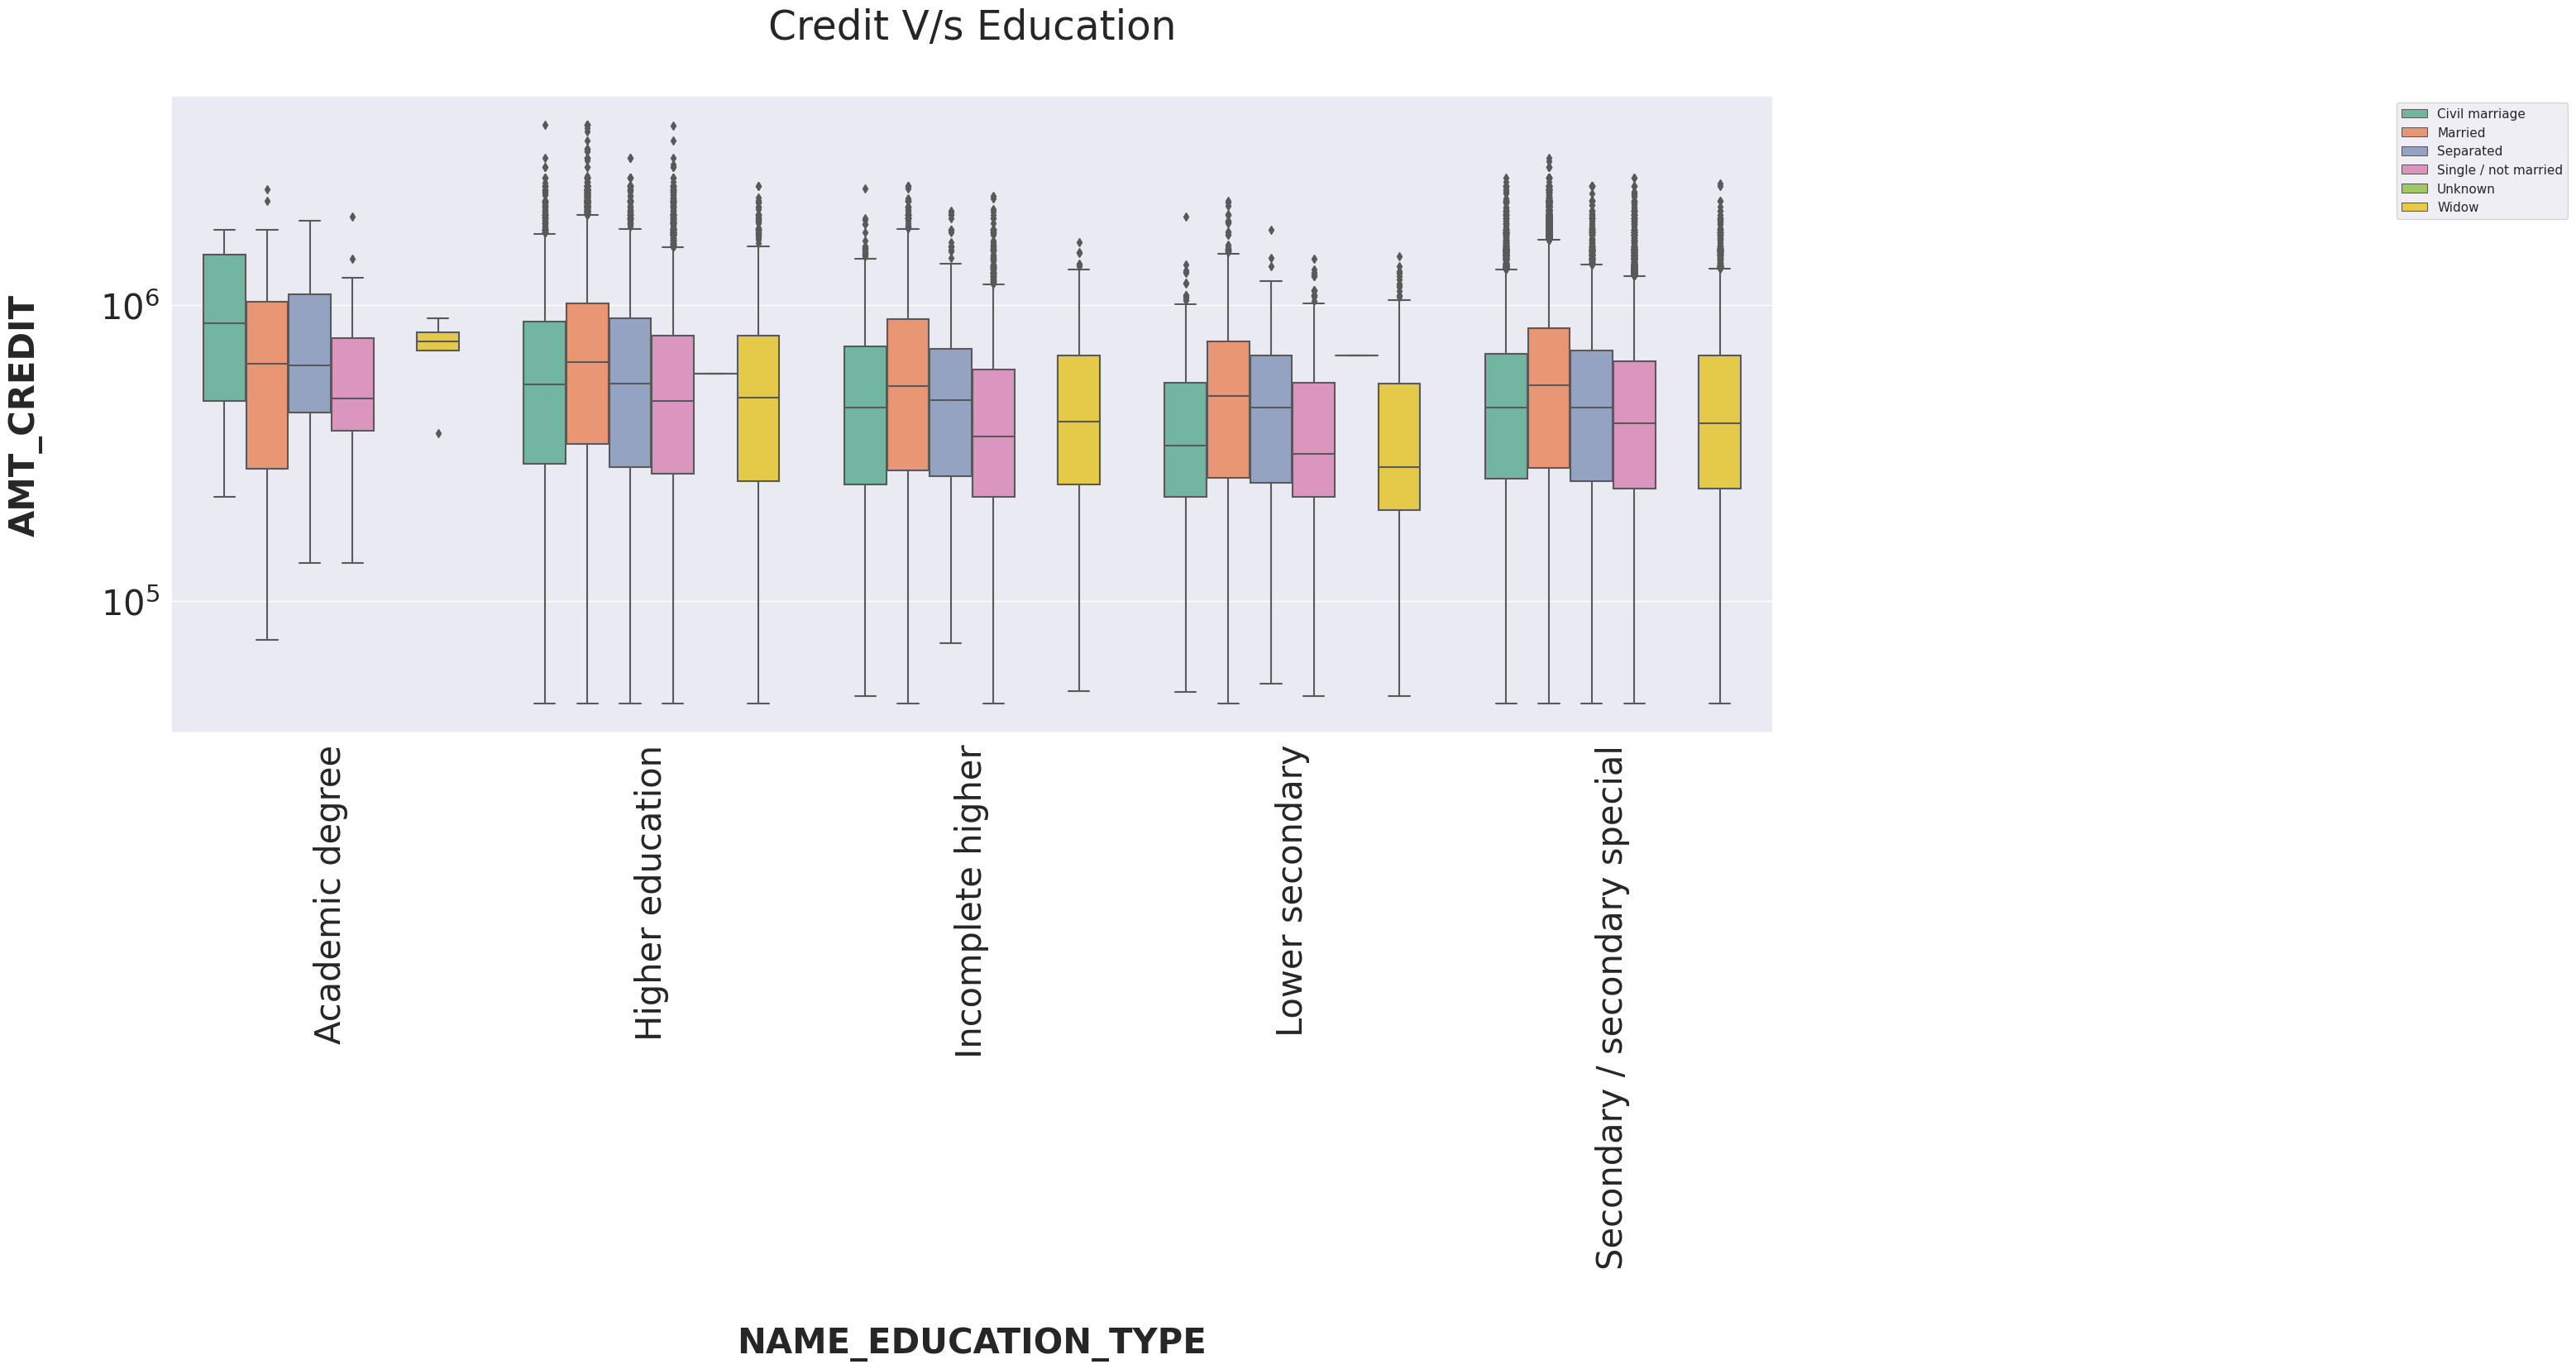

In [ ]:
plt.figure(figsize=(25,10))
plt.yscale('log')
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

---
Insight are mention below for the above plot,
* Clients without an academic degree but with other types of education have a high proportion of outliers.
* The majority of clients' credit balances, are below 25%.
* Clients with academic degrees and widows frequently take out loans with greater credit limits.
* Higher education, incomplete higher education, lower secondary education, and secondary/secondary special education are among the clientele groups that are more prone to take out large credit loans.

---

##For Target 1

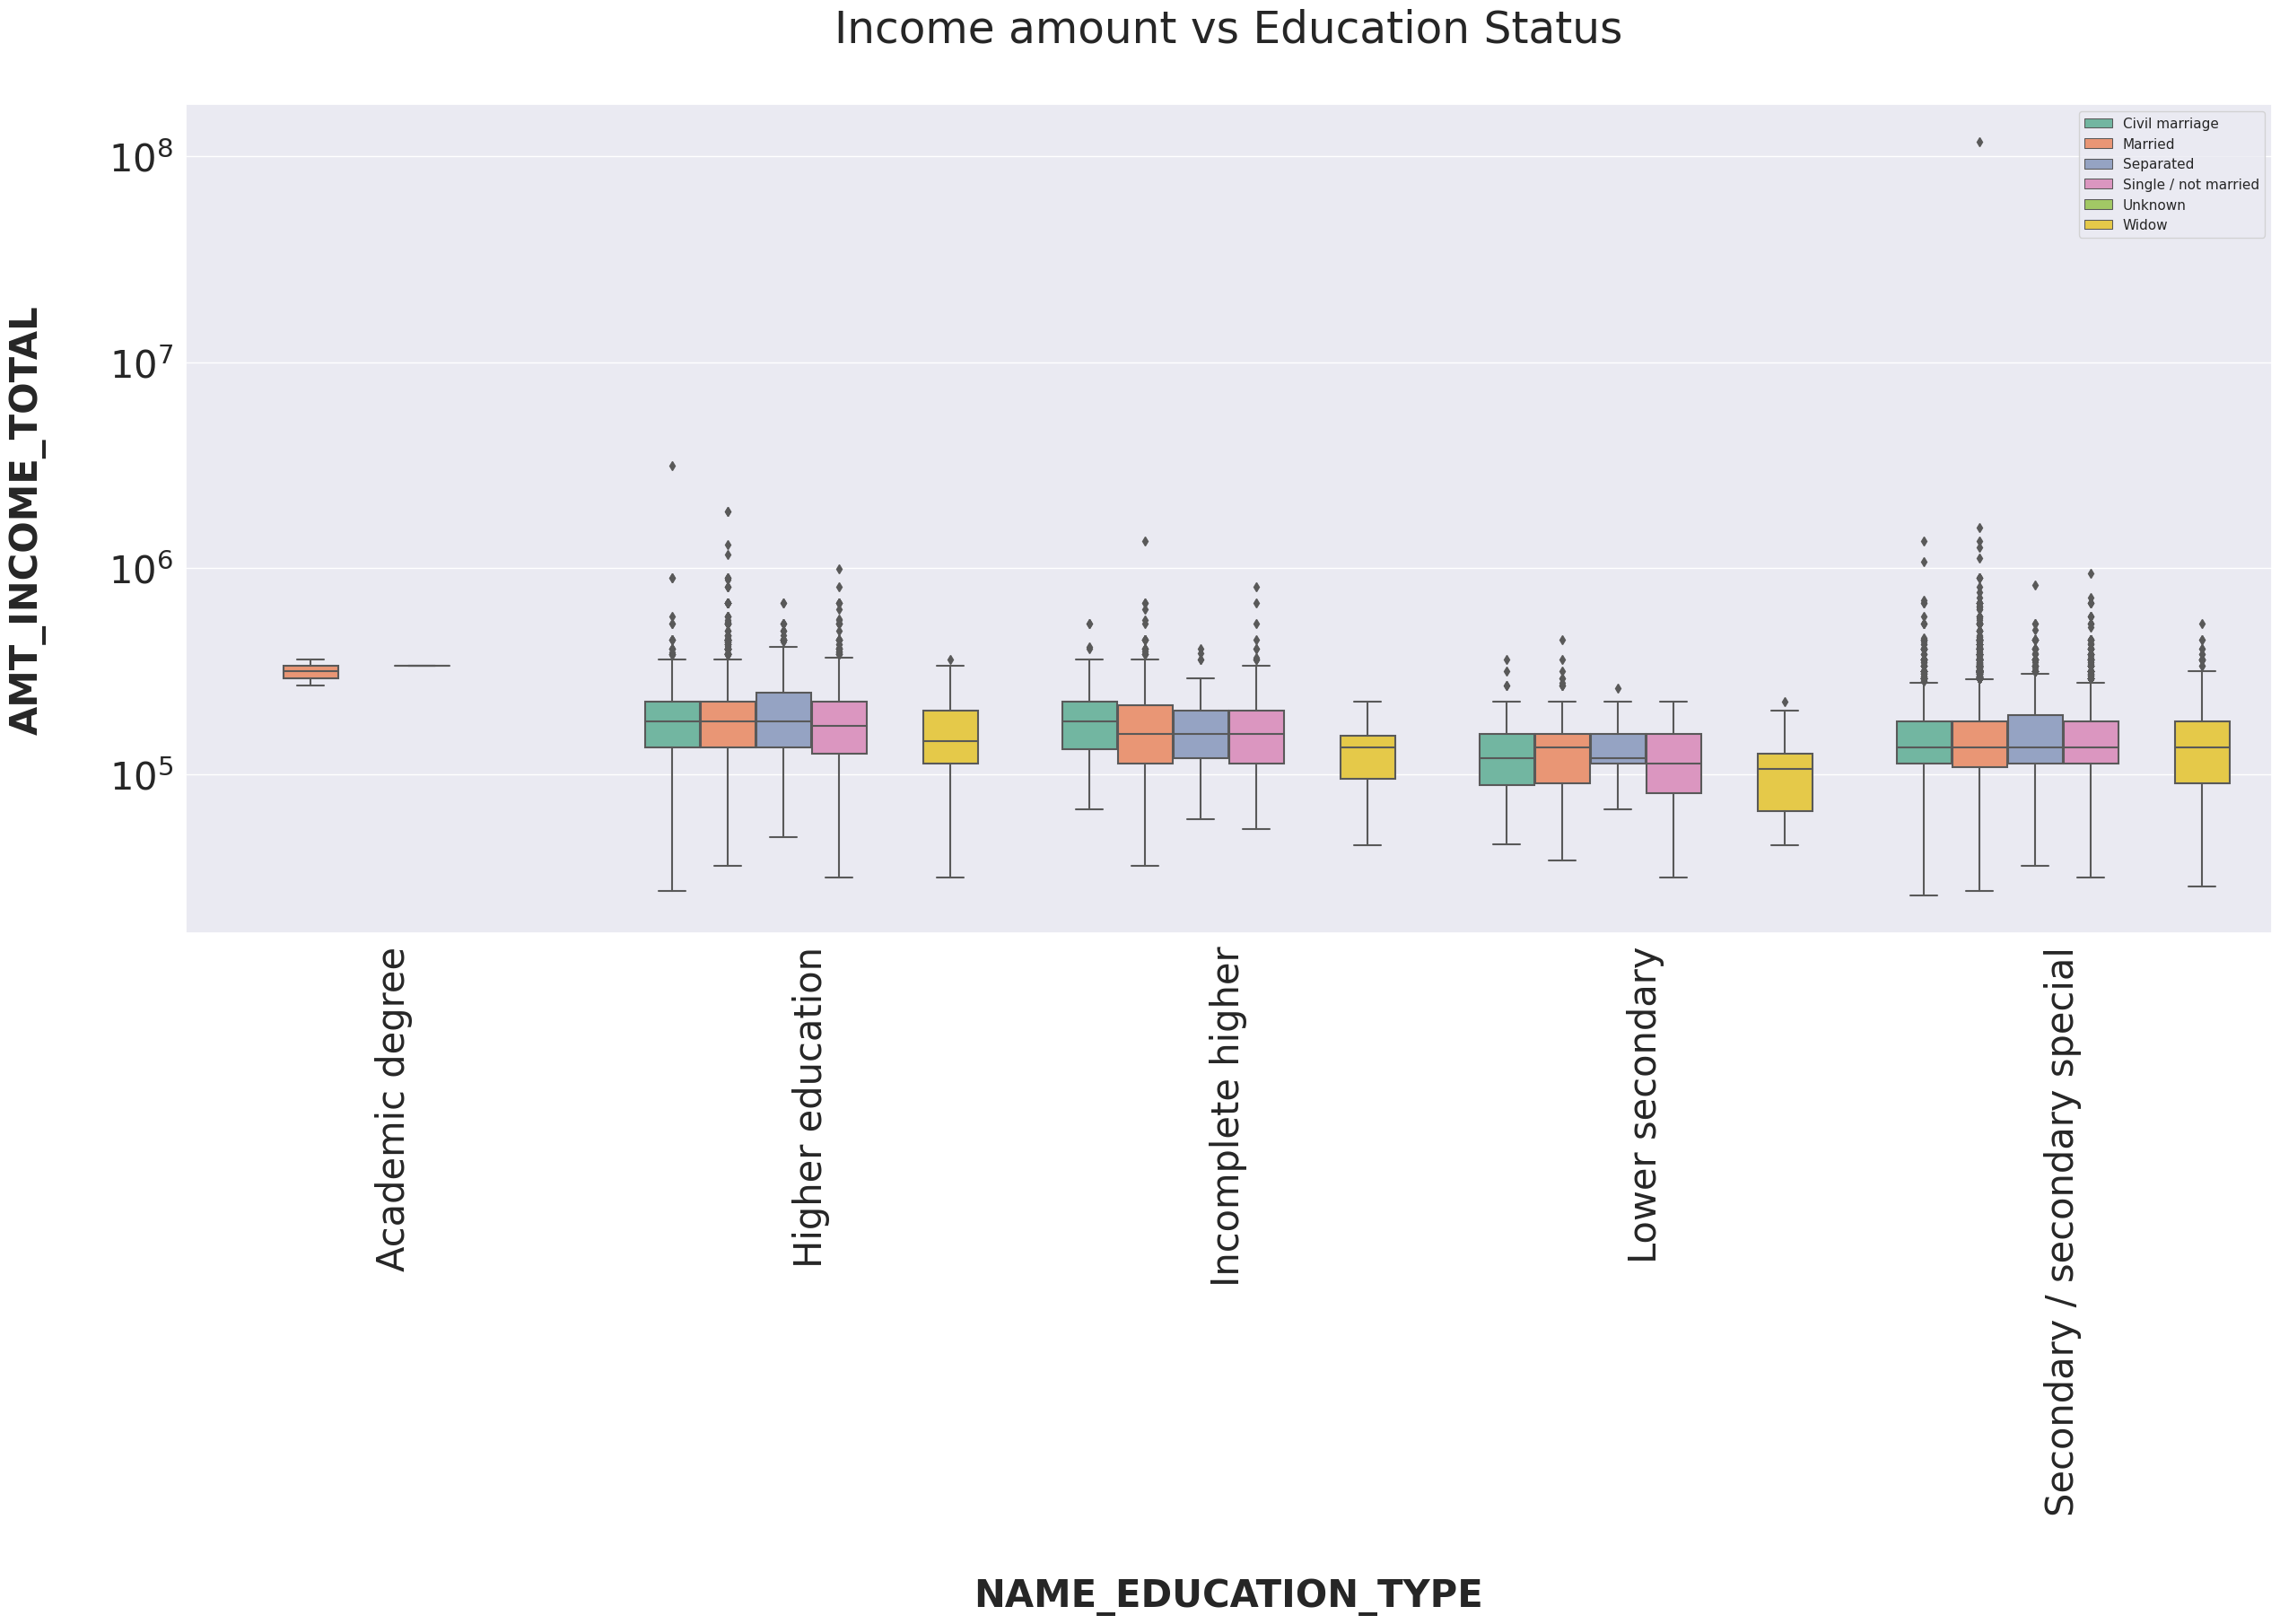

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

---
Insight from above plot
* Married clients with academic degrees earn significantly less money than other clients.
* Defaulter Clients make a lot less money than Non-Defaulters do.
---

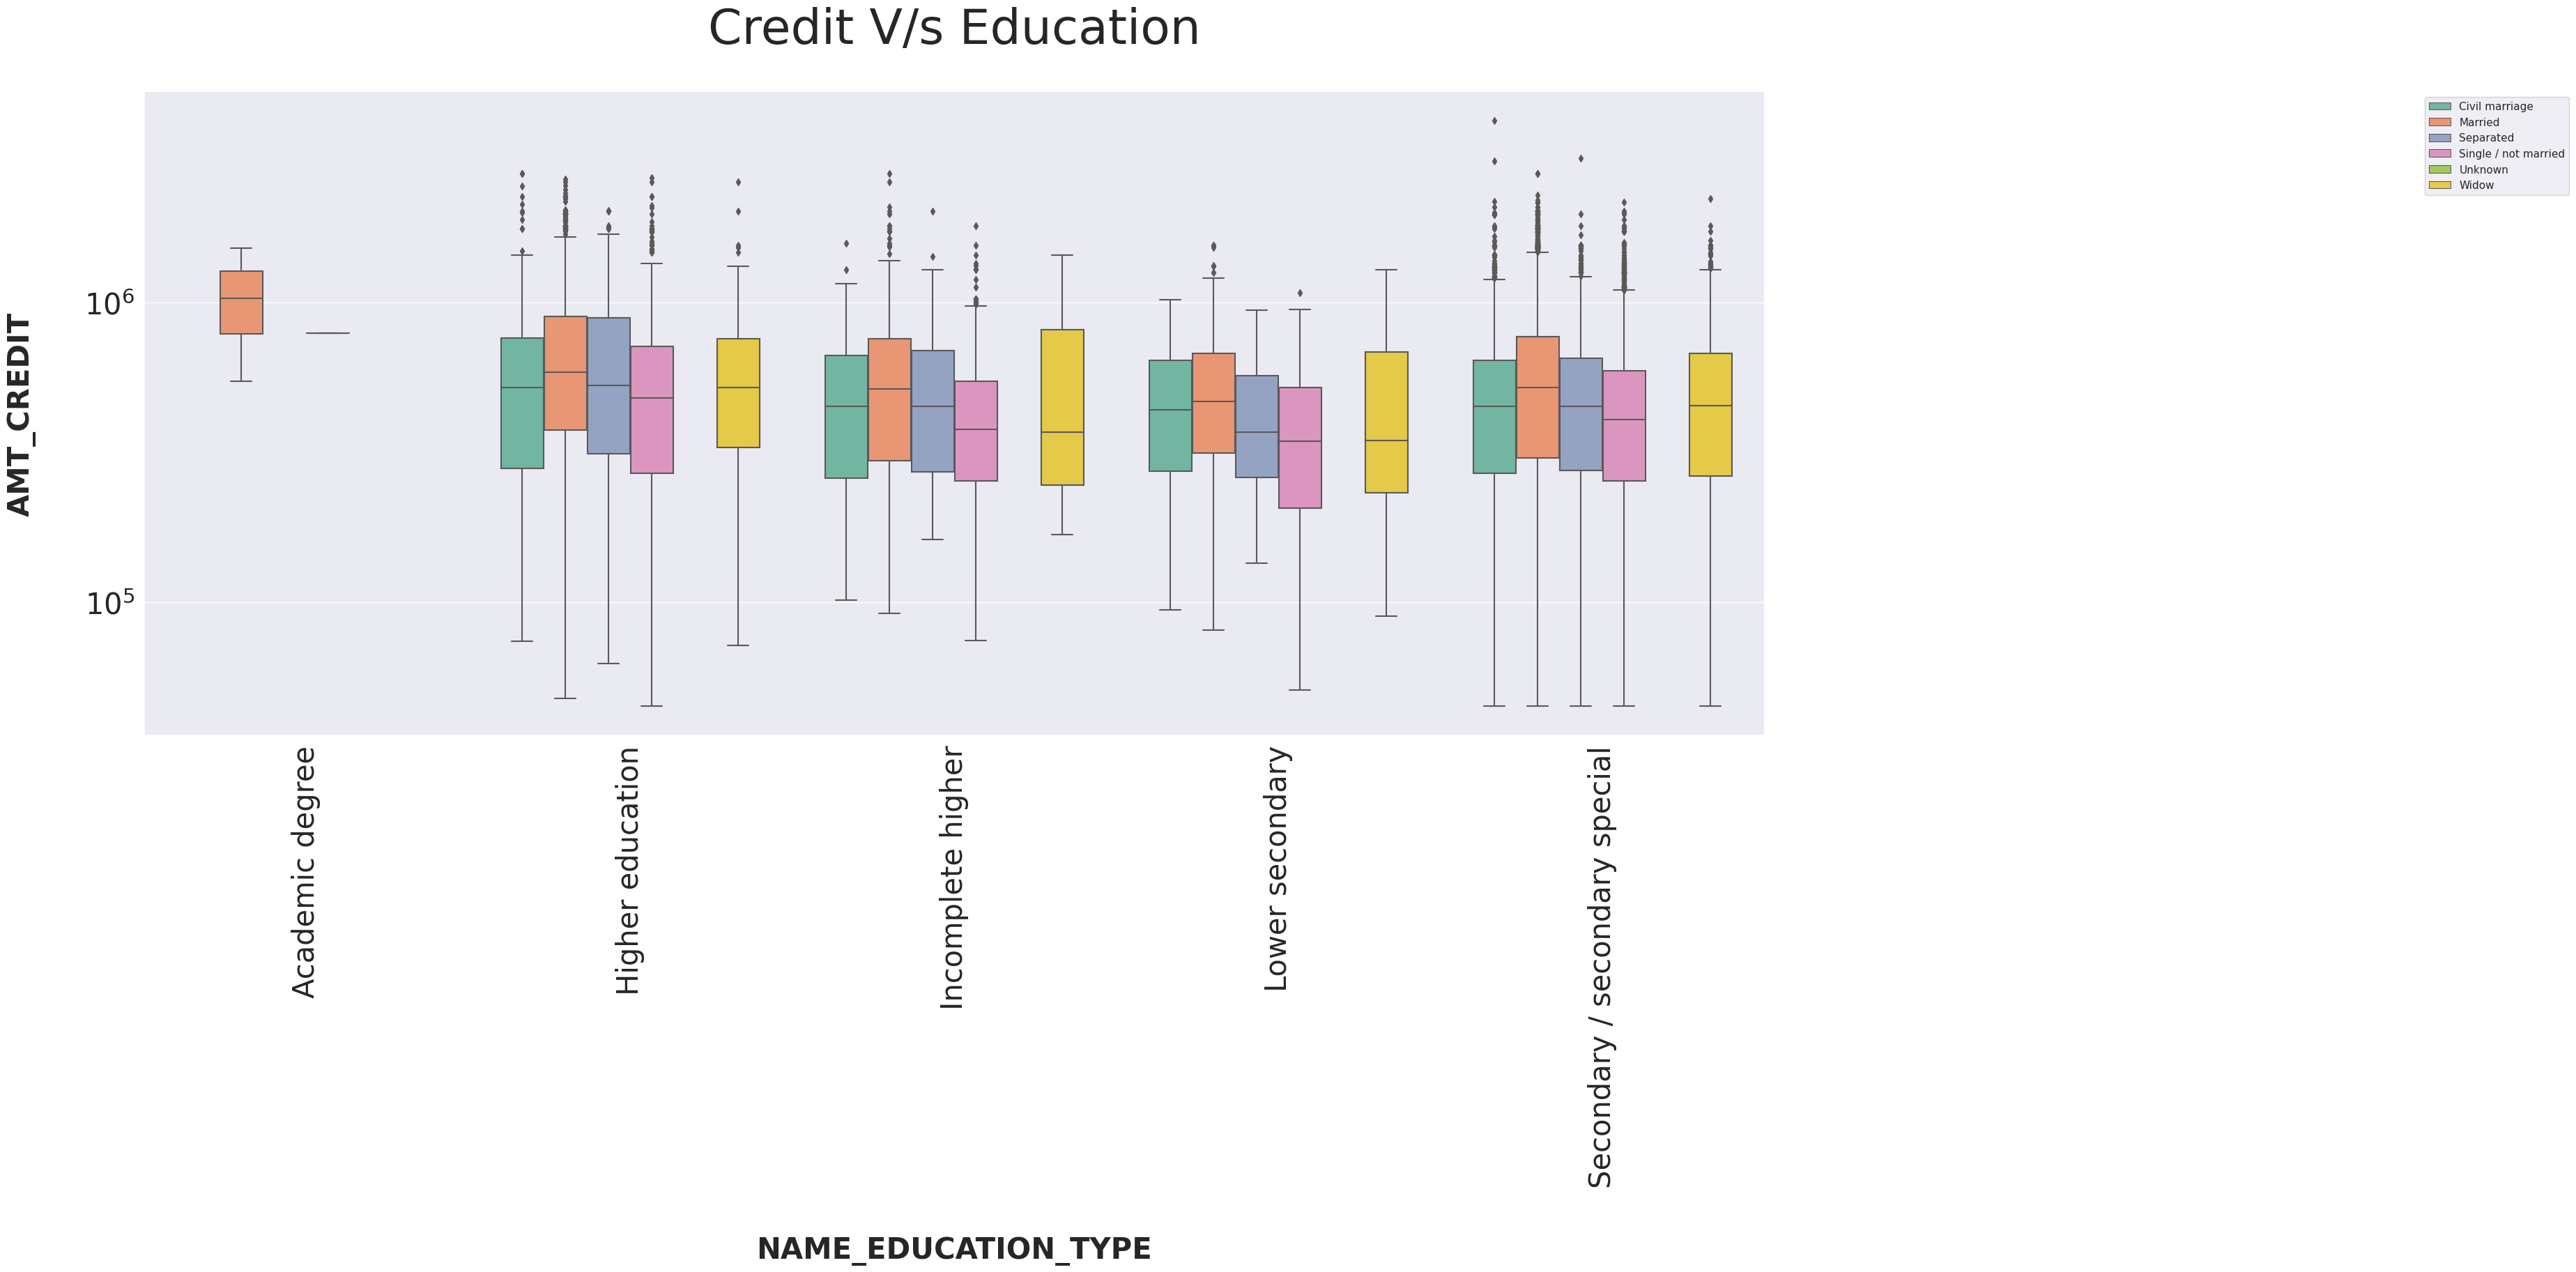

In [ ]:
plt.figure(figsize=(30,12))
plt.yscale('log')
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')



plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

---
From above plot, we got to know,
* Married client with academic seeking better credit loan submitted application. likewise lacks outliers. With no outliers, the boxplot for single clients with academic degrees is relatively small.
* Higher education, incomplete higher education, lower secondary education, and secondary/secondary special education are among the clientele groups that are more prone to take out large credit loans.

---

#Brivariate Analysis of categorial column

### Calculate the percentage of target=1 per category value

In [ ]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

In [ ]:
biplot(applicationdata ,'AMT_INCOME_TYPE','Income range')

---
We got from above plot are,
* Following clients with medium and extremely low incomes in terms of default risk are clients with low incomes.
* High-paying clients are least likely to go into default.

---

In [ ]:
biplot(applicationdata ,'NAME_CONTRACT_TYPE','Contract type')

---
Only thing we got form plat is,
* Cash loans are more likely to default than revolving loans, which have a comparably lower risk.

---

In [ ]:
biplot(applicationdata ,'NAME_INCOME_TYPE','Income type')

---
Insight
* Number of clients by income category Even though maternity leave is just five weeks long, the probability of payment default is the lowest of all income categories.
* The same situation is seen with unemployed people.Despite the exceedingly low count, there is little chance of payment default.
* Pensioners, public employees, and business partners are more likely to default.
* Although the number of working clients asking for loans is quite high, the danger of payment default is lower than it is for other clients.

---

In [ ]:
biplot(applicationdata ,'NAME_EDUCATION_TYPE','Education type')

---
What we got from above plot are
* Higher educated and academically qualified clients are less likely to default.
* Lower secondary and secondary special education clients are at a very high risk of default.

---

In [ ]:
biplot(applicationdata ,'OCCUPATION_TYPE','Occupation type')

---
We learn few things from above plot
* Low-skilled workers are more likely to default.
* Managers, highly skilled technicians, and accountants are less likely to default.

---

In [ ]:
biplot(applicationdata ,'NAME_HOUSING_TYPE','Housing type')

---
Insight
* The majority of loan applications come from borrowers who live in homes or apartments.While it is evident that candidates who rent apartments and those who live with their parents have very high default rates

---

#To determine the maximum percent of loan-payment difficulties, distribute CODE_GENDER with regard to AMT_INCOME_RANGE in a pivot table.


In [ ]:
table= pd.pivot_table(applicationdata, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'], columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.050254   
            HIGH                    0.105263          0.041516   
            VERY_HIGH               0.076923          0.037289   
M           VERY_LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.070086   
            HIGH                    0.000000          0.055911   
            VERY_HIGH               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.078431         0.096983   
            HIGH                      0.074313         0.038961   
            VERY_HIGH                 0.082251         0.066667   
M           VERY_LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.095130         0.150515   
            HIGH                      0.074627         0.081633   
            VERY_HIGH                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.075692  
            HIGH                                  0.070736  
            VERY_HIGH                             0.065930  
M           VERY_LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.113466  
            HIGH                                  0.093484  
            VERY_HIGH                             0.089939

---
What wer got from table are mention below.
* Higher probability of default for female consumers with academic degrees and high income types
* The probability of default is higher for male clients with secondary or secondary special education and all types of wages.
* High risk of default exists for male clients with incomplete education and very low salaries.
* Male clients with less than a high school diploma are at a very high or moderate risk of defaulting.

---


#Let's find Co-relation

In [ ]:
numerical_col = applicationdata.select_dtypes(include='number').columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [ ]:
len(numerical_col)

35

#Finding corelation between numercial column using heat map

In [ ]:
corr0=applicationdata.iloc[0:,2:]
corr1=applicationdata.iloc[0:,2:]

t0=corr0.corr(method='spearman')
t1=corr1.corr(method='spearman')
def targets_corr(data,title):
    plt.figure(figsize=(15, 10))

    mask= np.zeros_like(data)
    mask[np.triu_indices_from(mask)]=True
    with sns.axes_style("white"):
        ax= sns.heatmap(data, mask=mask,cmap='RdYlGn')

#For target 0

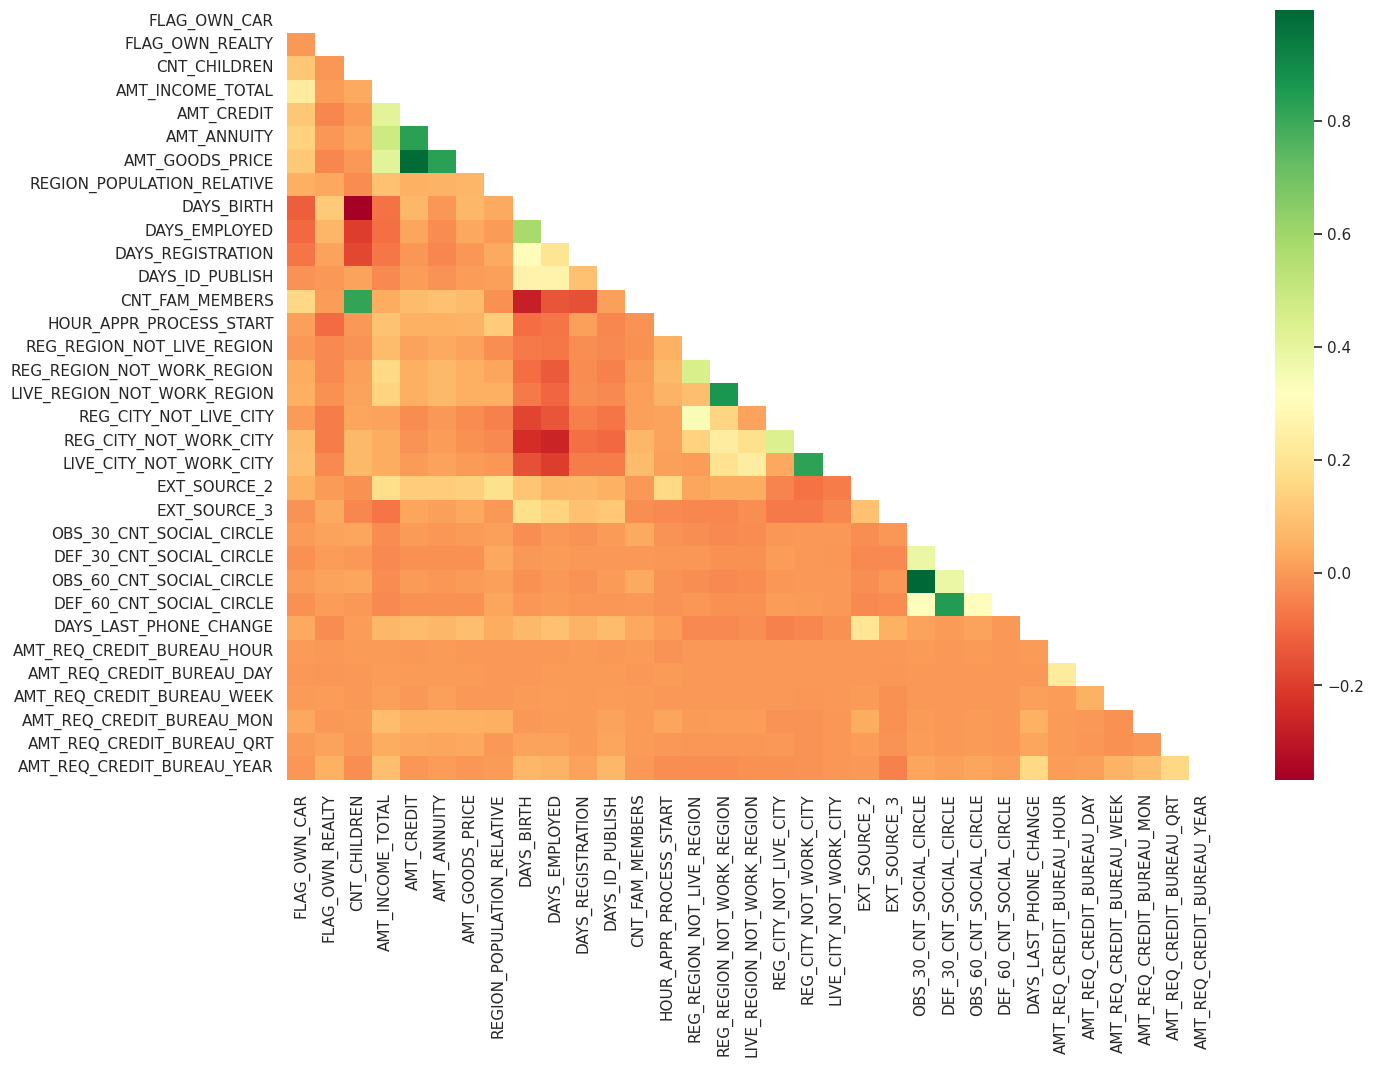

In [ ]:
targets_corr(data=t0,title='Correlation for Target 0')

---
Insight
* People that are younger in age tend to take out larger loans, and vice versa, because AMT_CREDIT is inversely related to days_birth.

* AMT_CREDIT and CNT_CHILDREN are inversely correlated, which indicates that credit amounts are larger for clients with fewer children and vice versa.

* AMT_INCOME_TOTAL and CNT_CHILDREN are inversely proportional, which indicates that a client will have more income if they have less children and vice versa.

* In a heavily populated location, clients have fewer children.

* AMT_CREDIT is higher in areas with a lot of people.

* Also greater in heavily populated areas is AMT_INCOME_TOTAL.


---

#For target 1

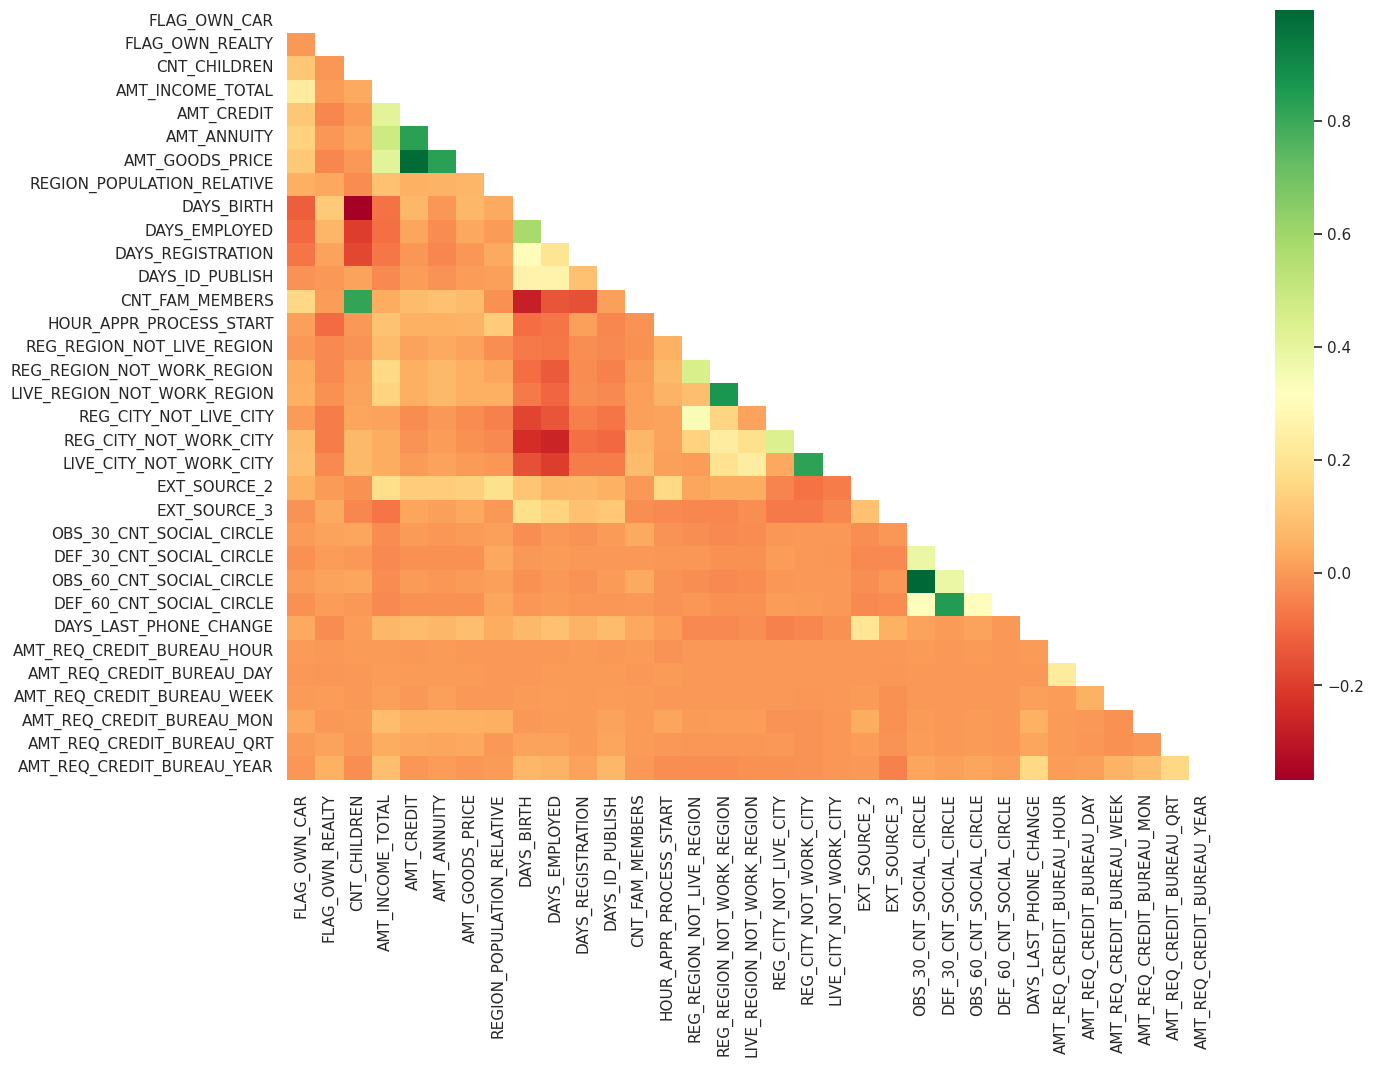

In [ ]:
targets_corr(data=t1,title='Correlation for Target 1')

---
Similar observations to those for Target 0 are included in this heat map for Target 1. However, there are some differences. Below is a list of them.

* Less children are being born at the client's permanent address, which differs from the contact address.

* Less children are being born, and the client's permanent address differs from their workplace address.

---

#Finding corelation using pair plot

#For target 0

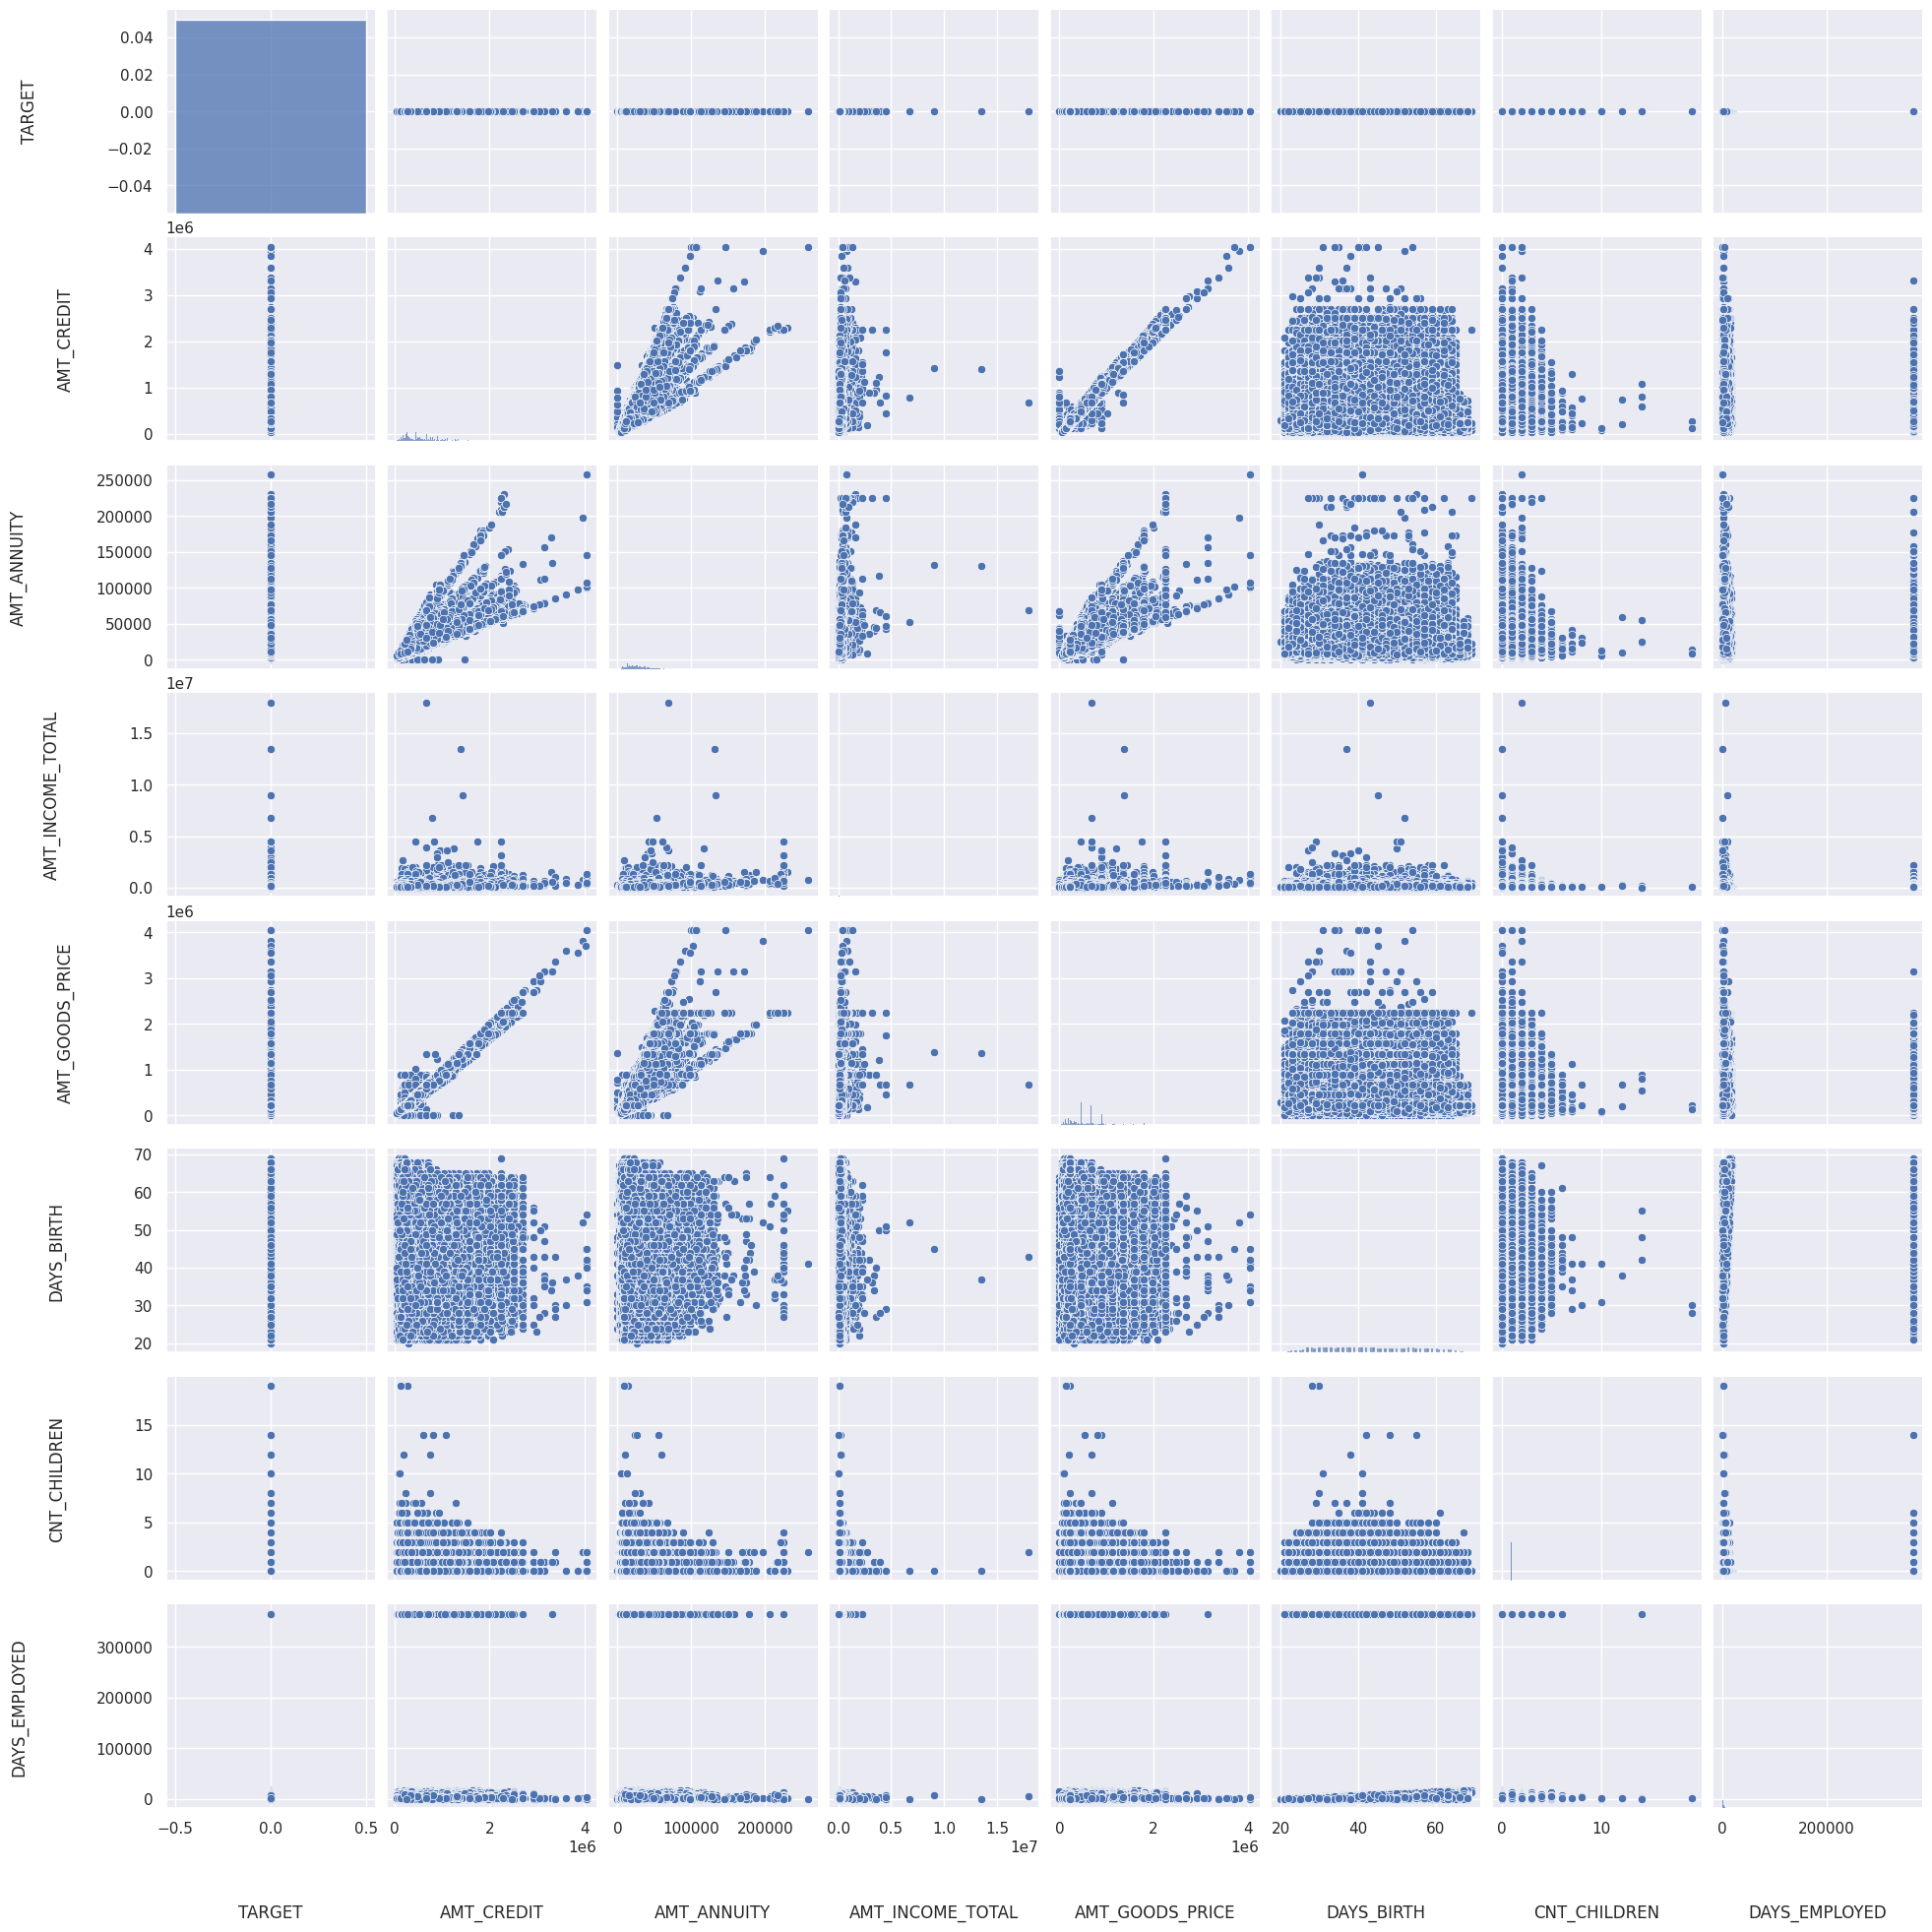

In [ ]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

#For target 1

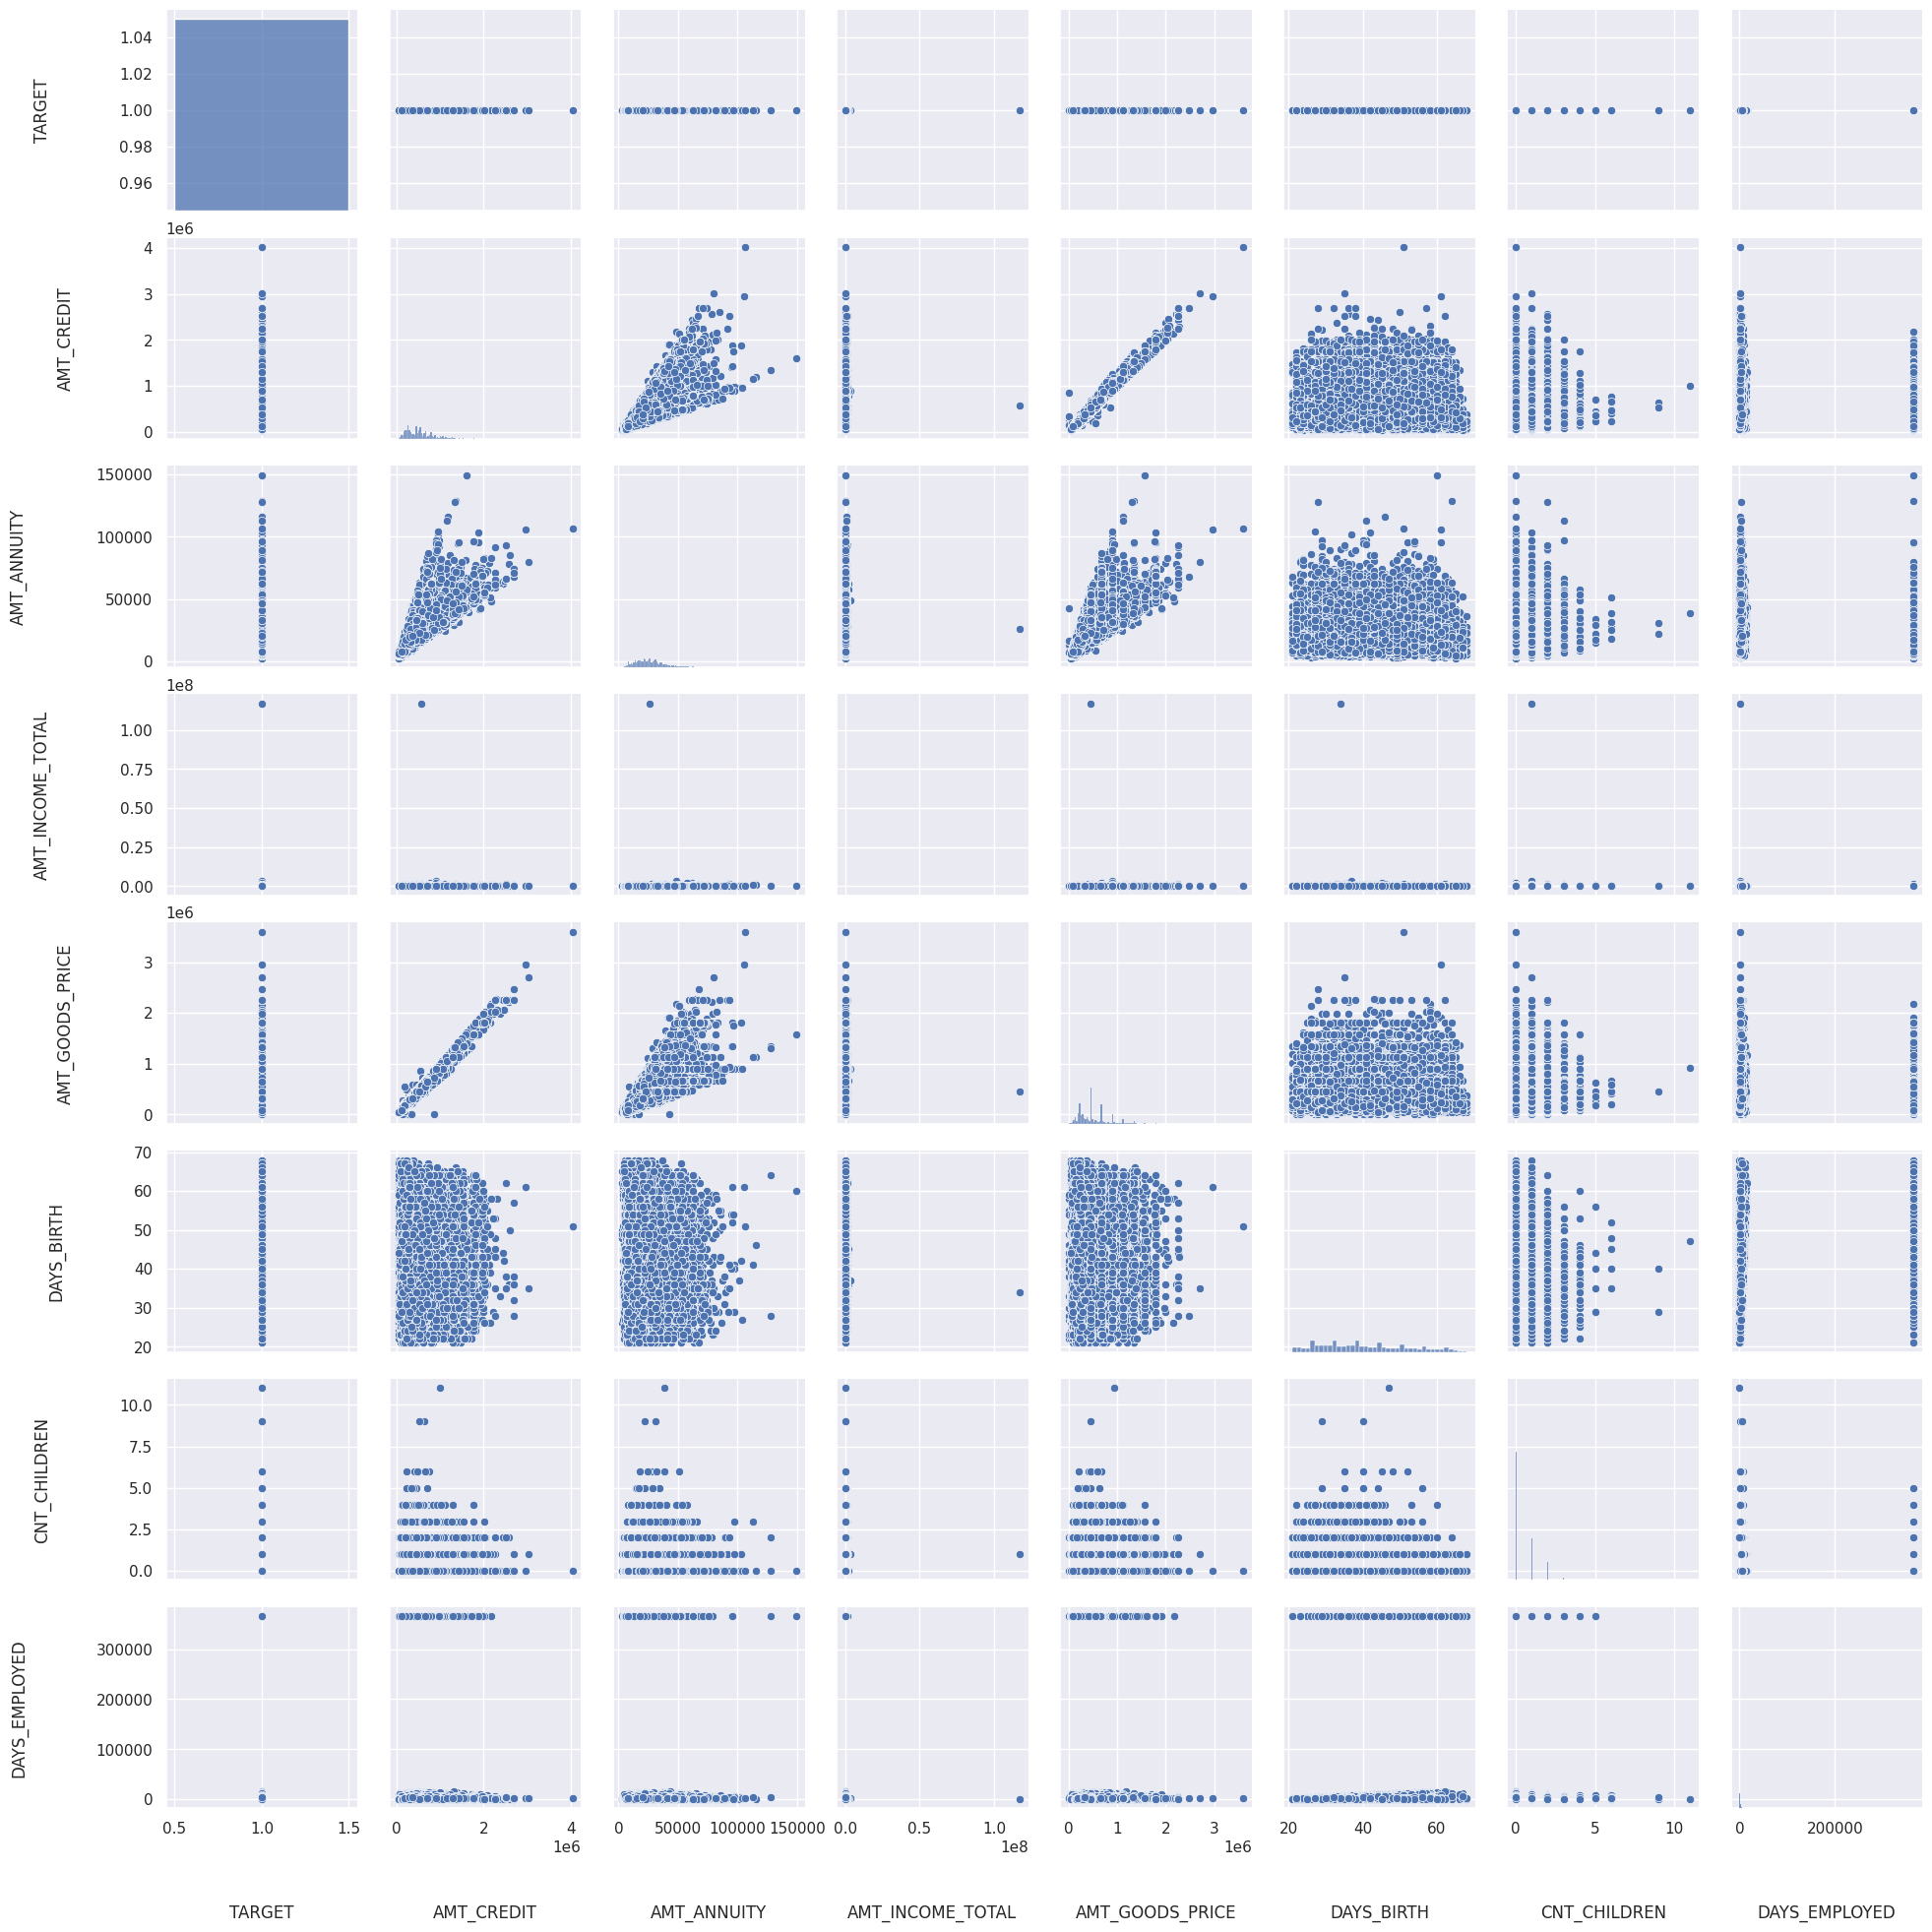

In [ ]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

---
We we got,
* Both defaulters and non-defaulters have a strong correlation between the variables AMT_CREDIT and AMT_GOODS_PRICE. Consequently, if the cost of a property rises, so does the loan balance.

* Both defaulters and non-defaulters have substantial correlations between the variables AMT_CREDIT and AMT_ANNUITY (EMI). Therefore, it makes sense that if the price of a property rises, the EMI would as well.

* Due to the significant correlation between defaulters and non-defaulters for all three variables (AMT_CREDIT, AMT_GOODS_PRICE, and AMT_ANNUITY), an effective signal for defaulter identification may not be possible.

---

#Comprising Top 10 corelation for better understanding the data based on target 0 and 1

#Target 0

In [ ]:
Columns=Target0.columns
corr=Target0[Columns].corr(method = 'pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
top10_corr0=corr.unstack().reset_index()
top10_corr0.columns = ['VAR1','VAR2','CORRELATION']
top10_corr0.dropna(subset=['CORRELATION'],inplace=True)
top10_corr0['CORR_ABS']=top10_corr0['CORRELATION'].abs()
top10_corr0.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998510   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859371   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686   
251                  AMT_ANNUITY                  AMT_CREDIT     0.771309   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.626028   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.626028  
611  0.446101

#Target 1

In [ ]:
Columns=Target1.columns
corr1=Target1[Columns].corr(method = 'pearson')
corr1=corr1.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
top10_corr1=corr1.unstack().reset_index()
top10_corr1.columns = ['VAR1','VAR2','CORRELATION']
top10_corr1.dropna(subset=['CORRELATION'],inplace=True)
top10_corr1['CORR_ABS']=top10_corr0['CORRELATION'].abs()
top10_corr1.sort_values('CORR_ABS', ascending=False).head(10)

VAR1                        VAR2  CORRELATION  \
934     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998270   
286              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103   
494              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484   
647  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885   
970     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.869016   
755      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540   
287              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699   
251                  AMT_ANNUITY                  AMT_CREDIT     0.752195   
395                DAYS_EMPLOYED                  DAYS_BIRTH     0.582441   
611   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937   

     CORR_ABS  
934  0.998510  
286  0.987250  
494  0.878571  
647  0.861861  
970  0.859371  
755  0.830381  
287  0.776686  
251  0.771309  
395  0.626028  
611  0.446101

---
Main insight
* Top 10 correlations in the populations with defaults and non defaulter are almost at the same level.

---

#Now lets work on another file know as previous apllication file which contain dataset of previouse apllication

###Loading file using pandas

In [ ]:
previousdata = pd.read_csv("previous_application.csv")
previousdata.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
previousdata.shape

(582820, 37)

In [ ]:
previousdata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582820 entries, 0 to 582819
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   582820 non-null  int64  
 1   SK_ID_CURR                   582820 non-null  int64  
 2   NAME_CONTRACT_TYPE           582820 non-null  object 
 3   AMT_ANNUITY                  453466 non-null  float64
 4   AMT_APPLICATION              582820 non-null  float64
 5   AMT_CREDIT                   582820 non-null  float64
 6   AMT_DOWN_PAYMENT             272923 non-null  float64
 7   AMT_GOODS_PRICE              449282 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   582820 non-null  object 
 9   HOUR_APPR_PROCESS_START      582820 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  582820 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       582820 non-null  int64  
 12  RATE_DOWN_PAYMENT            272923 non-null  float64
 13 

In [ ]:
(previousdata.isnull().sum()/len(previousdata)*100).sort_values(ascending = False).head(30)

RATE_INTEREST_PRIVILEGED     99.641742
RATE_INTEREST_PRIMARY        99.641742
RATE_DOWN_PAYMENT            53.171991
AMT_DOWN_PAYMENT             53.171991
NAME_TYPE_SUITE              49.139872
NFLAG_INSURED_ON_APPROVAL    40.004289
DAYS_FIRST_DRAWING           40.004289
DAYS_FIRST_DUE               40.004289
DAYS_LAST_DUE_1ST_VERSION    40.004289
DAYS_LAST_DUE                40.004289
DAYS_TERMINATION             40.004289
AMT_GOODS_PRICE              22.912391
AMT_ANNUITY                  22.194503
CNT_PAYMENT                  22.194331
PRODUCT_COMBINATION           0.020075
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_YIELD_GROUP              0.000000
SELLERPLACE_AREA              0.000000
NAME_SELLER_INDUSTRY          0.000000
NAME_GOODS_CATEGORY           0.000000
NAME_PORTFOLIO                0.000000
SK_ID_PREV                    0.000000
NAME_CLIENT_TYPE              0.000000
CODE_REJECT_REASON            0.000000
SK_ID_CURR               

#Data Cleaning

No. of column whith value percentage greater than 35

In [ ]:
null_col = previousdata.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(previousdata))]
len(null_col)

11

Removing this column

In [ ]:
label = list(null_col.index.values)
previousdata.drop(labels = label,axis=1,inplace = True)

Verifing the data set size after droping the column

In [ ]:
previousdata.shape

(582820, 26)

In [ ]:
null = (previousdata.isnull().sum()/len(previousdata)*100).sort_values(ascending = False).head(50)
null.head(30)

AMT_GOODS_PRICE                22.912391
AMT_ANNUITY                    22.194503
CNT_PAYMENT                    22.194331
PRODUCT_COMBINATION             0.020075
NAME_PAYMENT_TYPE               0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
CODE_REJECT_REASON              0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_CREDIT                      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

#Handling the missing values
---
Note : We can handle msiing values same way we did in pervious dataset
Also, i will not mention each step as information. will directly run code while leavinhg main heading such as Data handling, Data cleaning  and so on.

---

In [ ]:
previousdata.AMT_GOODS_PRICE.fillna(previousdata.AMT_GOODS_PRICE.median(),inplace = True)
previousdata.AMT_ANNUITY.fillna(previousdata.AMT_ANNUITY.mode()[0],inplace = True)
previousdata.CNT_PAYMENT.fillna(previousdata.CNT_PAYMENT.mode()[0],inplace = True)
(previousdata.isnull().sum()/len(previousdata)*100).sort_values(ascending=False)

PRODUCT_COMBINATION            0.020075
SK_ID_CURR                     0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
NAME_PAYMENT_TYPE              0.000000
SK_ID_PREV                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_CREDIT                     0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000
NAME_CONTRACT_TYPE             0.000000


#Error handling in dataset

In [ ]:
previousdata=previousdata.drop(previousdata[previousdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previousdata=previousdata.drop(previousdata[previousdata['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previousdata=previousdata.drop(previousdata[previousdata['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
previousdata.shape

(24022, 26)

#Now to get clear idea for the business, we need to merge the 2 dataset together in variable knows as mergedata

In [ ]:
mergedata=pd.merge(left=applicationdata,right=previousdata,how='inner',on='SK_ID_CURR',suffixes='_x')

In [ ]:
mergedata = mergedata.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1) #renamed for better understanding through proper knowledge


#loan Distribution and requirnment

In [ ]:

fig = make_subplots(rows=1, cols=2,subplot_titles=("Percentage of NAME_CLIENT_TYPE","Percentage of NAME_CONTRACT_STATUS"),
                   specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels = mergedata['NAME_CLIENT_TYPE'].value_counts().index.to_list(),
                     values = mergedata['NAME_CLIENT_TYPE'].value_counts().to_list() ,textinfo='label+percent'),1, 1)
fig.add_trace(go.Pie(labels = mergedata['NAME_CONTRACT_STATUS'].value_counts().index.to_list(),
                     values = mergedata['NAME_CONTRACT_STATUS'].value_counts().to_list(), textinfo='label+percent'),1, 2)
fig.update_traces(hole=.4,showlegend=False)
fig.show()

---
What we get from the abov plot are,
1. NAME_CLIENT_TYPE
  * About 80.7% of the customers who applied for loans again.
  * 14.5% of the loan applicants are new customers.
2. NAME_CONTRACT_STATUS

  Percentage of contracts that were or were not granted in previous applications
  * Approved :- 38.8%
  * Refused :- 58.5%
  * Canceled :- 2.3%
  * Unused offer :- 0.31%
---

In [ ]:
mergedata.CHANNEL_TYPE.value_counts()

Credit and cash offices       14456
AP+ (Cash loan)                2502
Country-wide                   1726
Channel of corporate sales     1016
Contact center                  760
Regional / Local                 40
Stone                            34
Name: CHANNEL_TYPE, dtype: int64

#NAME_CONTRACT_STATUS with NAME_CASH_LOAN_PURPOSE

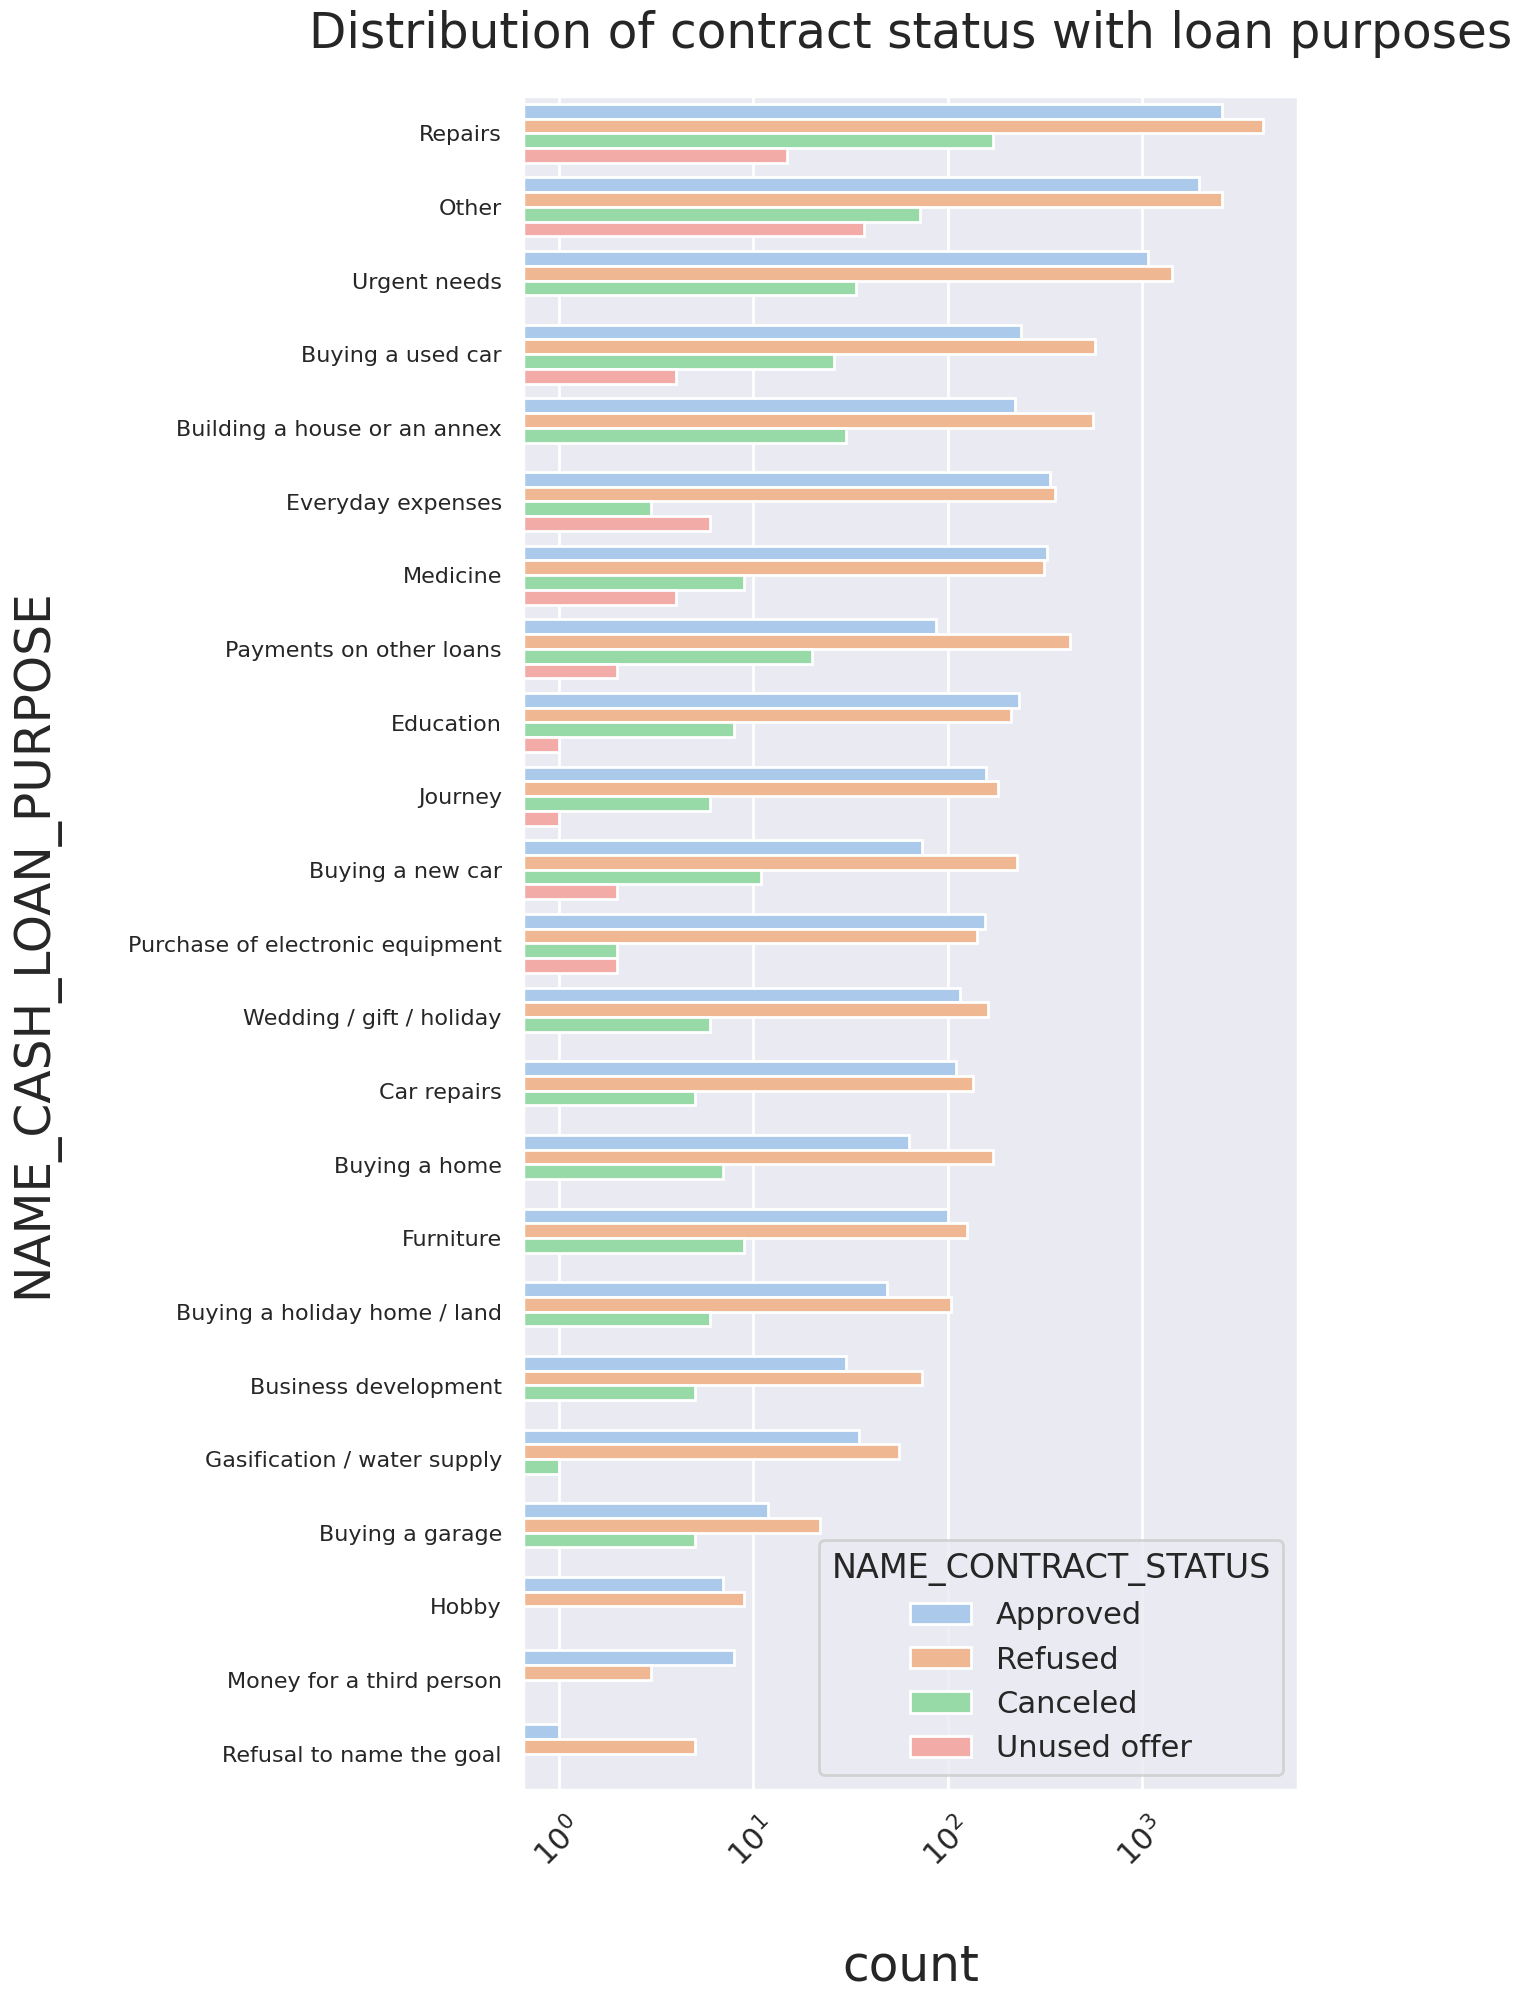

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 35
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of contract status with loan purposes')
ax = sns.countplot(data = mergedata, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=mergedata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')

---
Insight
* The majority of loan rejections were for "Repairs".

* We have an equal number of approvals and rejections for "Education" and "Medicine" objectives.

* Paying off other debt and purchasing a new automobile are far more likely to be rejected than approved.


---

#TARGET with NAME_CASH_LOAN_PURPOSE

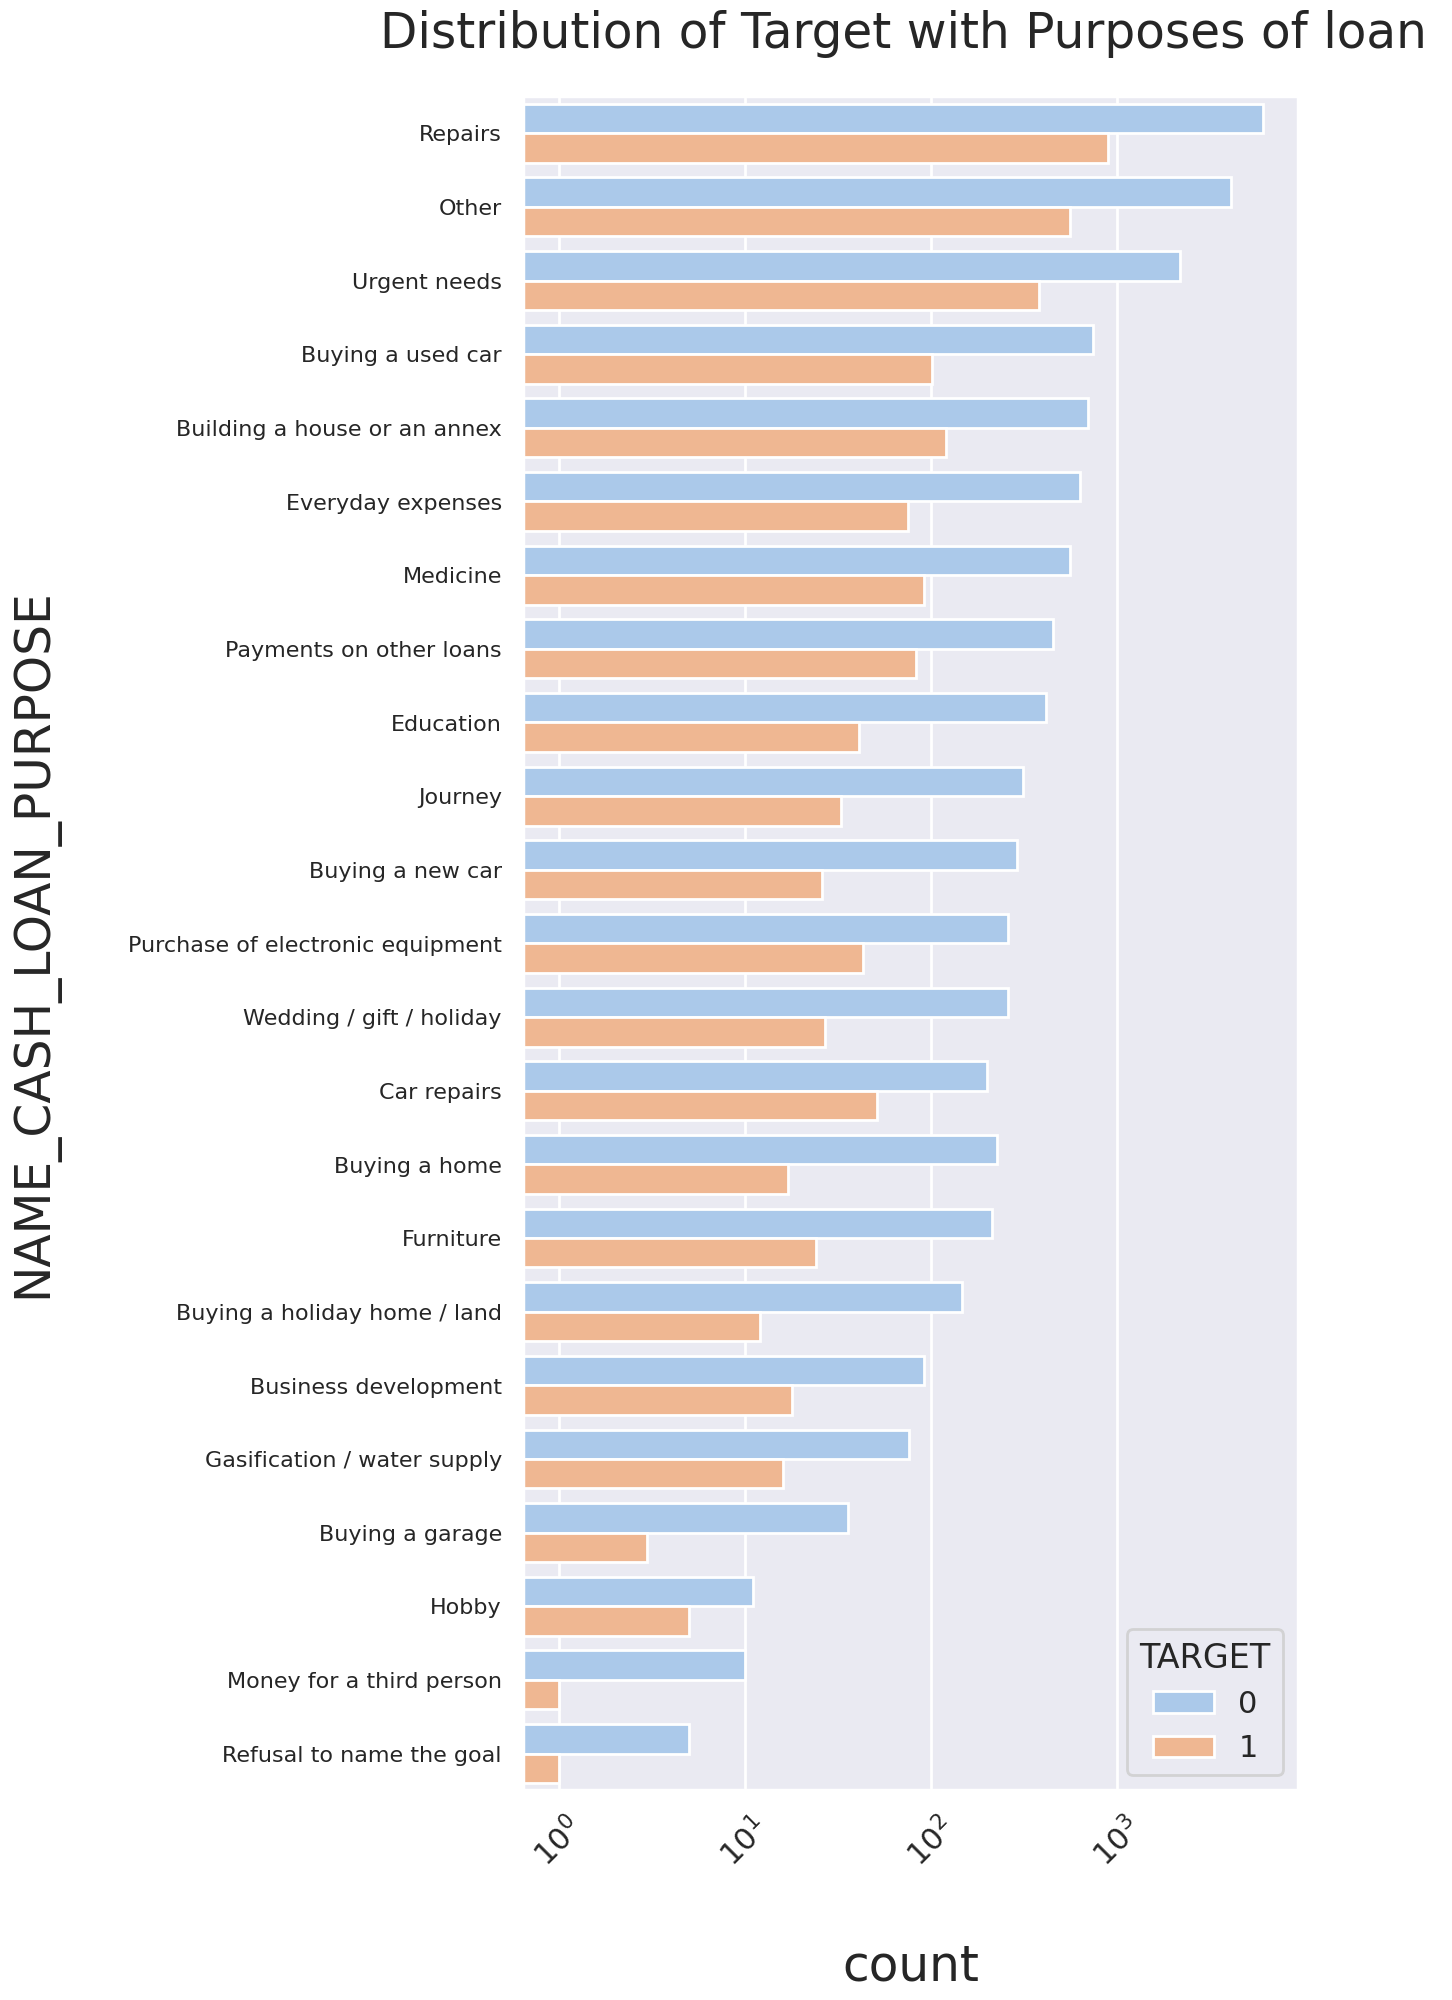

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(10,22))
plt.rcParams["axes.labelsize"] = 35
plt.rcParams['axes.titlesize'] = 35
plt.rcParams['axes.titlepad'] = 35
plt.xticks(rotation=45)
plt.yticks(fontsize=16)
plt.xscale('log')
plt.title('Distribution of Target with Purposes of loan ')
ax = sns.countplot(data = mergedata, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=mergedata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='pastel')

---
What we found from above plot, we got few things.
* For both of the goals, "Repairs" also exhibits a considerable degree of variance.

* Comparing "Education" & "Medicine" reasons, a higher percentage of patients are having trouble repaying their loans in the medical field than in "Education."

* Purchasing a secondhand car" and "Building purpose customer experiencing financial troubles" had a same percentage.

---


#Distibution between AMT_CREDIT & NAME_HOUSING_TYPE

In [ ]:
mergedata.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU

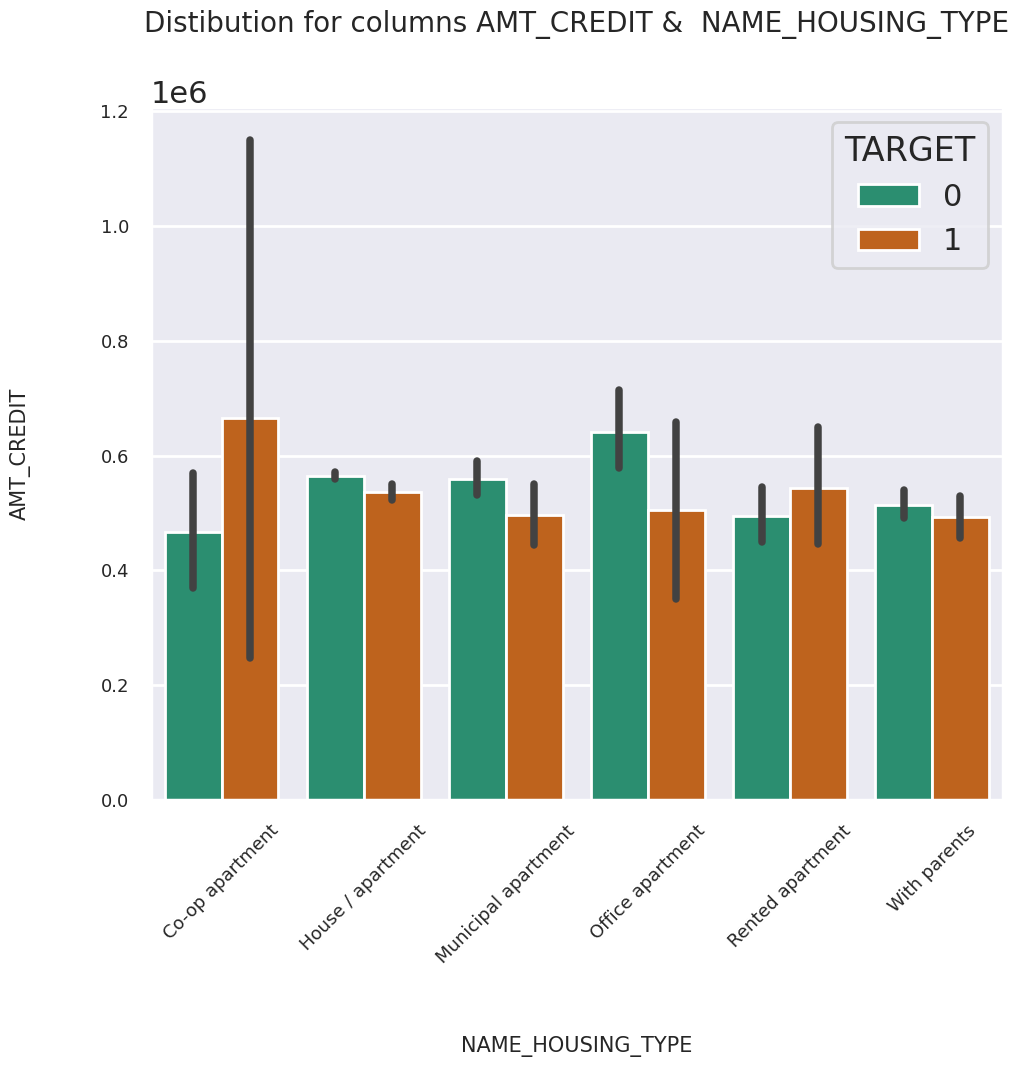

In [ ]:
plt.figure(figsize=(11,9))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 30
sns.barplot(data =mergedata, y='AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE',palette='Dark2')
plt.title("Distibution for columns AMT_CREDIT &  NAME_HOUSING_TYPE\n")
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13, rotation=360)
plt.show()

---
What we got from this is mention below.
* Here, the office apartment has a higher goal credit of 0 while the co-op apartment has a higher target credit of 1. We may thus draw the conclusion that a bank should refrain from lending to the co-op flat housing type because of their payment issues. For successful payments, the bank can concentrate mostly on dwelling types such as those with parents, houses, apartments, or municipal apartments.

---

---
#Final Conclusion
* When the percentages of Payment Difficulties and non-Payment Difficulties are compared, we see a drop in the number of retirees and an increase in the percentage of working Payment Difficulties.

* When compared to the proportions of both Loan Payment Difficulties and Loan Non-Payment Difficulties, we see a drop in the proportion of married and widowed with Loan Payment Difficulties and an increase in the percentage of single and civil married with Loan Payment Difficulties.

* When comparing the percentages of Loan Payment Issues and Loan NonPayment Difficulties, we see an increase in the percentage of Loan Payment Difficulties with secondary/secondary special education and a reduction in the proportion of Loan Payment Challenges with higher education.

* Banks should pay greater attention to contract type. For successful payments, students, pensioners, and business owners with housing types other than co-op apartments and office apartments should apply.

* Banks need to concentrate less on earnings type Working since they have the highest proportion of failed payments.

* The count of 'Lower Secondary' in 'NAME_EDUCATION_TYPE' is rather low, and it also has the highest percentage of payment difficulties- about 11%. As a result, clients with a 'Lower Secondary' education level are the driving causes for loan defaulters.

* The number of 'Low skilled Labourers' in 'OCCUPATION_TYPE' is comparably small, and it also has the highest percentage of payment difficulties- about 17%. As a result, clients classified as 'Low skilled Labourers' are the primary drivers of loan defaulters.

* Get as many clients as possible based on dwelling type. With parents because they have the fewest failed payments

* Furthermore, with loan purpose Repair has a larger frequency of failed payments on time.

* Applicants residing in houses/apartments have the most loan applications. While we can observe that rented apartments and candidates living with their parents have a very high default rate,

---